# An Investigation Into Financial Inclusion in the Phillipines: Patterns, Gaps, and Opportunities

The Philippines is experiencing a dramatic transformation in how its citizens manage money. This analysis investigates three fundamental dimensions of Filipino financial behavior—**spending, saving, and borrowing**—to understand how Filipinos interact with both traditional and digital financial systems.

Drawing on a decade of data (2014-2024) across the ASEAN-6 region (Philippines, Indonesia, Malaysia, Singapore, Thailand, and Vietnam), we examine trends in digital payment adoption, the shift from traditional banks to mobile wallets, and the persistent reliance on informal credit networks. By analyzing demographic patterns across income levels, educational attainment, and generational cohorts, this investigation reveals critical gaps in financial inclusion and offers insights into the structural barriers that prevent full digital adoption.

Finally, this report provides evidence-based findings for policymakers, fintech companies, and financial institutions seeking to understand the complexities of Filipino financial behavior and identifies pathways toward more inclusive and effective digital financial services.

## Data Sources

**Primary Dataset:** World Bank Global Findex Database (2025 Release)

**Coverage:** 2014, 2017, 2021, 2024

**Geographic Scope:** ASEAN-6 countries (Philippines, Indonesia, Malaysia, Singapore, Thailand, Vietnam)

**Source URL**: Global Findex Database 2024: https://www.worldbank.org/en/publication/globalfindex/download-data

_Raw data files will also be provided._

**Secondary Dataset:** Global Findex Microdata (2025 Release)

**Coverage:** 2024 (individual-level survey response, collected from nationally representative surveys of about 145,000 adults)

**Geographic Scope:** 141 countries

**Source URL**: Global Findex 2025 Microdata: https://microdata.worldbank.org/index.php/catalog/7860/study-description

_Raw data file will also be provided._

# Preliminaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

%matplotlib auto

Using matplotlib backend: module://matplotlib_inline.backend_inline


# Part I: Data Understanding and Preparatiom

## Primary Dataset: World Bank Global Findex Database

### Data Loading

In [2]:
#Getting a DtypeWarning. Set low_memory=False to get around it
#Low_memory=False instructs pandas to read the entire file before
#inferring data types. It significantly increases memory usage though
#In the path, use trailing dots to go one directory level
orig_df = pd.read_csv('../../data/raw/GlobalFindexDatabase2025.csv', low_memory=False)

In [3]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8564 entries, 0 to 8563
Columns: 437 entries, countrynewwb to con32h_s
dtypes: float64(430), int64(1), object(6)
memory usage: 28.6+ MB


In [4]:
orig_df.describe()

,year,pop_adult,account_t_d,fiaccount_t_d,mobileaccount_t_d,borrow_any_t_d,fin4_d,dig_acc,fin11_2a,fin11a,fin11b,fin11c,fin11f,fin11d,fin11e,fin14a,fin14b,fin14c,fin14d,fin13_1a,fin13_1b,fin26a,fin26b,fin27a,fin27b,fin17f,fin17a_17a1_d,fin17a,fin17b,fin17c,fin22d,fin22e,fin22a_22a1_22g_d,fin22a,fin22a_1,fin22b,fin22c,fin24sav,fin24fam,fin24work,fin24bor,fin24sell,fin24other,fin24aVD,fin24aSD,fin24aND,fin24aSD_ND,fin24aP,fin24aN,fin24sav_SD_ND,fin24fam_SD_ND,fin24work_SD_ND,fin24bor_SD_ND,fin24sell_SD_ND,fin24other_SD_ND,fin24sav_VD,fin24fam_VD,fin24work_VD,fin24bor_VD,fin24sell_VD,fin24other_VD,fh1,fin28,fh2,fin29,fin31a_31b,fin30,fin31a,fin31b,fin31d,fin32_33_34a,fin32_33_34b,fin32_33_34c,fin32_33_34d,fin32_33_acc,fin32_33,fin32_n33_34a,fin32_n33_34b,fin32_n33_34c,fin32_n33_34d,fin32_n33_acc,fin32_n33,fin32,fin32_acc,fin34a,fin34b,fin34c,fin34d,fin37_38_39a,fin37_38_39b,fin37_38_39c,fin37_38_39d,fin37_38_39_acc,fin37_38,fin37_39a,fin37_39b,fin37_39c,fin37_39d,fin37_39_acc,fin37,fin38_39a,fin38_39b,fin38_39c,fin38_39d,fin38_39_acc,fin38,fin2_t_d,fin42,fin42_acc,fin43a,fin43b,fin43c,fin43d,fin45a,fin45c,fin45d,fin45e,fin45b,fin25e2,fin9b,fin10,fin22g,fin22h,inactive_t_d,fing2p_acc,fing2p_card,fing2p_cash,fing2p_fin,fing2p_mob,fing2p,g20_made,g20_received,g20_any,merchant_pay,save_any_t_d,fin11_1,fin5w,fin5m,fin5lm,fin5n,fin6w,fin6m,fin6lm,fin6n,fin11_0,fin9a,fin17dw,fin17dm,fin17dlm,fin17e,fin7,fin3,fin19,fin20,fin21,fin24ba,fin24bb,fin24bc,fin24bd,fin24c,fin24d1,fin24d2,fin24d3,fin25e1,fin25e2b,fin25e3w,fin25e3m,fin25e3lm,fin25e4a,fin25e4b,fin25e4c,fin25e4d,fin25e4e,fh2a,fin31c,fin36a,fin36b,fin40a,fin40b,fin36Aa,fin36Ab,fin8,fin13aw,fin13am,fin13alm,fin13an,fin13bw,fin13bm,fin13blm,fin13bn,fin13cw,fin13cm,fin13clm,fin13cn,fin13e,fin13f,fin13f_1,fin15,fin16,fin22f,fin41,fin35,fin44,fh1_fh2,fin28_29,fin31d_s,fin32_n33_34c_s,fin34c_s,fin43c_s,fin32_acc_s,fin34a_s,fin32_33_acc_s,inactive_t_d_s,fing2p_fin_s,fin32_33_34a_s,fin32_n33_acc_s,fin37_39_acc_s,fin37_39c_s,fin31a_31b_s,fin31a_s,fin31b_s,fin32_n33_34a_s,fin37_39a_s,fin34d_s,fin32_33_34d_s,fin32_n33_34d_s,fing2p_card_s,fin37_39d_s,fin42_acc_s,fin32_33_34c_s,fin37_38_39c_s,fin38_39c_s,fing2p_acc_s,fing2p_cash_s,fin37_38_39a_s,fin37_38_39_acc_s,fin38_39a_s,fin38_39_acc_s,fin34b_s,fin32_n33_34b_s,fin43b_s,fin27b_s,fin27a_s,fin22h_s,fin28_29_s,fin28_s,fin29_s,fing2p_mob_s,fin37_38_39d_s,fin37_38_39b_s,fin37_39b_s,fin11_2a_s,fin11b_s,fin11f_s,fin11d_s,fin11e_s,fin9b_s,fin11_1_s,fin5m_s,fin6m_s,fin9a_s,fin5w_s,fin6w_s,fin17dm_s,fin17dlm_s,fin25e3w_s,fin25e3m_s,fin24d1_s,fin14d_s,fin24d2_s,fin11a_s,fin11c_s,fin5lm_s,fin6lm_s,fin17dw_s,fin14c_s,fin13_1a_s,fin13_1b_s,fin13am_s,fin13alm_s,fin13bm_s,fin13blm_s,fin13cm_s,fin13clm_s,fin21_s,fin14b_s,fin13cw_s,fin13f_s,fin14a_s,fin25e3lm_s,fin13aw_s,fin13bw_s,fin24d3_s,fin5n_s,fin6n_s,fin13f_1_s,fin32_33_34b_s,con1,con2a,con2b,con2c,con2d,con2e,con2f,con2g,con3a,con3b,con3c,con3d,con3e,con3f,con3g,con4,con5a,con5b,con6,con7,con8,con9a,con9b,con10,con11,con12d,con12w,con12m,con12lm,con13,con14,con15,con16,con17a,con17b,con17c,con17d,con18,con19,con20,con21,con22,con23,internet,con26d,con26w,con26m,con26lm,con27,con28d,con28w,con28m,con28lm,con28n,con29,con30a,con30b,con30c,con30d,con30e,con30f,con30g,con30h,con31a,con31b,con31c,con31d,con31e,con31f,con31g,con31h,con32a,con32b,con32c,con32d,con32e,con32f,con32g,con32h,con10_s,con11_s,con12d_s,con14_s,con16_s,con17a_s,con17b_s,con18_s,con19_s,con20_s,con21_s,con26d_s,con27_s,con28m_s,con30a_s,con30b_s,con30c_s,con30d_s,con30e_s,con30f_s,con30g_s,con30h_s,con31a_s,con31b_s,con31f_s,con2a_s,con15_s,con17d_s,con29_s,con31d_s,con31h_s,con32a_s,con3a_s,con4_s,con28d_s,con28w_s,con23_s,con31c_s,con2b_s,con2d_s,con26w_s,con2c_s,con2e_s,con2g_s,con5b_s,con12m_s,con26lm_s,con12w_s,con2f_s,con13_s,con26m_s,con28lm_s,con5a_s,con17c_s,con32h_s
count,8564.00,7880.00,8474.00,8382.00,2514.00,6412.00,1123.00,1375.00,620.00,440.00,512.00,356.00,380.00,608.00,740.00,277.00,265.00,336.00,454.00,322.00,239.00,3

Describe tells us that the indicators are expressed as aggregates (weighted averages)

In [5]:
orig_df.shape

(8564, 437)

The shape tells us that there are 8564 rows with 437 columns.

In [6]:
orig_df.dtypes

countrynewwb          object
codewb                object
year                   int64
pop_adult            float64
regionwb24_hi         object
incomegroupwb24       object
group                 object
group2                object
account_t_d          float64
fiaccount_t_d        float64
mobileaccount_t_d    float64
borrow_any_t_d       float64
fin4_d               float64
dig_acc              float64
fin11_2a             float64
fin11a               float64
fin11b               float64
fin11c               float64
fin11f               float64
fin11d               float64
fin11e               float64
fin14a               float64
fin14b               float64
fin14c               float64
fin14d               float64
fin13_1a             float64
fin13_1b             float64
fin26a               float64
fin26b               float64
fin27a               float64
fin27b               float64
fin17f               float64
fin17a_17a1_d        float64
fin17a               float64
fin17b        

In [7]:
orig_df.head(5)

,countrynewwb,codewb,year,pop_adult,regionwb24_hi,incomegroupwb24,group,group2,account_t_d,fiaccount_t_d,mobileaccount_t_d,borrow_any_t_d,fin4_d,dig_acc,fin11_2a,fin11a,fin11b,fin11c,fin11f,fin11d,fin11e,fin14a,fin14b,fin14c,fin14d,fin13_1a,fin13_1b,fin26a,fin26b,fin27a,fin27b,fin17f,fin17a_17a1_d,fin17a,fin17b,fin17c,fin22d,fin22e,fin22a_22a1_22g_d,fin22a,fin22a_1,fin22b,fin22c,fin24sav,fin24fam,fin24work,fin24bor,fin24sell,fin24other,fin24aVD,fin24aSD,fin24aND,fin24aSD_ND,fin24aP,fin24aN,fin24sav_SD_ND,fin24fam_SD_ND,fin24work_SD_ND,fin24bor_SD_ND,fin24sell_SD_ND,fin24other_SD_ND,fin24sav_VD,fin24fam_VD,fin24work_VD,fin24bor_VD,fin24sell_VD,fin24other_VD,fh1,fin28,fh2,fin29,fin31a_31b,fin30,fin31a,fin31b,fin31d,fin32_33_34a,fin32_33_34b,fin32_33_34c,fin32_33_34d,fin32_33_acc,fin32_33,fin32_n33_34a,fin32_n33_34b,fin32_n33_34c,fin32_n33_34d,fin32_n33_acc,fin32_n33,fin32,fin32_acc,fin34a,fin34b,fin34c,fin34d,fin37_38_39a,fin37_38_39b,fin37_38_39c,fin37_38_39d,fin37_38_39_acc,fin37_38,fin37_39a,fin37_39b,fin37_39c,fin37_39d,fin37_39_acc,fin37,fin38_39a,fin38_39b,fin38_39c,fin38_39d,fin38_39_acc,fin38,fin2_t_d,fin42,fin42_acc,fin43a,fin43b,fin43c,fin43d,fin45a,fin45c,fin45d,fin45e,fin45b,fin25e2,fin9b,fin10,fin22g,fin22h,inactive_t_d,fing2p_acc,fing2p_card,fing2p_cash,fing2p_fin,fing2p_mob,fing2p,g20_made,g20_received,g20_any,merchant_pay,save_any_t_d,fin11_1,fin5w,fin5m,fin5lm,fin5n,fin6w,fin6m,fin6lm,fin6n,fin11_0,fin9a,fin17dw,fin17dm,fin17dlm,fin17e,fin7,fin3,fin19,fin20,fin21,fin24ba,fin24bb,fin24bc,fin24bd,fin24c,fin24d1,fin24d2,fin24d3,fin25e1,fin25e2b,fin25e3w,fin25e3m,fin25e3lm,fin25e4a,fin25e4b,fin25e4c,fin25e4d,fin25e4e,fh2a,fin31c,fin36a,fin36b,fin40a,fin40b,fin36Aa,fin36Ab,fin8,fin13aw,fin13am,fin13alm,fin13an,fin13bw,fin13bm,fin13blm,fin13bn,fin13cw,fin13cm,fin13clm,fin13cn,fin13e,fin13f,fin13f_1,fin15,fin16,fin22f,fin41,fin35,fin44,fh1_fh2,fin28_29,fin31d_s,fin32_n33_34c_s,fin34c_s,fin43c_s,fin32_acc_s,fin34a_s,fin32_33_acc_s,inactive_t_d_s,fing2p_fin_s,fin32_33_34a_s,fin32_n33_acc_s,fin37_39_acc_s,fin37_39c_s,fin31a_31b_s,fin31a_s,fin31b_s,fin32_n33_34a_s,fin37_39a_s,fin34d_s,fin32_33_34d_s,fin32_n33_34d_s,fing2p_card_s,fin37_39d_s,fin42_acc_s,fin32_33_34c_s,fin37_38_39c_s,fin38_39c_s,fing2p_acc_s,fing2p_cash_s,fin37_38_39a_s,fin37_38_39_acc_s,fin38_39a_s,fin38_39_acc_s,fin34b_s,fin32_n33_34b_s,fin43b_s,fin27b_s,fin27a_s,fin22h_s,fin28_29_s,fin28_s,fin29_s,fing2p_mob_s,fin37_38_39d_s,fin37_38_39b_s,fin37_39b_s,fin11_2a_s,fin11b_s,fin11f_s,fin11d_s,fin11e_s,fin9b_s,fin11_1_s,fin5m_s,fin6m_s,fin9a_s,fin5w_s,fin6w_s,fin17dm_s,fin17dlm_s,fin25e3w_s,fin25e3m_s,fin24d1_s,fin14d_s,fin24d2_s,fin11a_s,fin11c_s,fin5lm_s,fin6lm_s,fin17dw_s,fin14c_s,fin13_1a_s,fin13_1b_s,fin13am_s,fin13alm_s,fin13bm_s,fin13blm_s,fin13cm_s,fin13clm_s,fin21_s,fin14b_s,fin13cw_s,fin13f_s,fin14a_s,fin25e3lm_s,fin13aw_s,fin13bw_s,fin24d3_s,fin5n_s,fin6n_s,fin13f_1_s,fin32_33_34b_s,con1,con2a,con2b,con2c,con2d,con2e,con2f,con2g,con3a,con3b,con3c,con3d,con3e,con3f,con3g,con4,con5a,con5b,con6,con7,con8,con9a,con9b,con10,con11,con12d,con12w,con12m,con12lm,con13,con14,con15,con16,con17a,con17b,con17c,con17d,con18,con19,con20,con21,con22,con23,internet,con26d,con26w,con26m,con26lm,con27,con28d,con28w,con28m,con28lm,con28n,con29,con30a,con30b,con30c,con30d,con30e,con30f,con30g,con30h,con31a,con31b,con31c,con31d,con31e,con31f,con31g,con31h,con32a,con32b,con32c,con32d,con32e,con32f,con32g,con32h,con10_s,con11_s,con12d_s,con14_s,con16_s,con17a_s,con17b_s,con18_s,con19_s,con20_s,con21_s,con26d_s,con27_s,con28m_s,con30a_s,con30b_s,con30c_s,con30d_s,con30e_s,con30f_s,con30g_s,con30h_s,con31a_s,con31b_s,con31f_s,con2a_s,con15_s,con17d_s,con29_s,con31d_s,con31h_s,con32a_s,con3a_s,con4_s,con28d_s,con28w_s,con23_s,con31c_s,con2b_s,con2d_s,con26w_s,con2c_s,con2e_s,con2g_s,con5b_s,con12m_s,con26lm_s,con12w_s,con2f_s,con13_s,con26m_s,con28lm_s,con5a_s,con17c_s,con32h_s
0,Afghanistan,AFG,2011,14575546.00,South Asia (excluding high income),Low income,all,all,0.09,0.09,

The first 5 rows tells us the following:
1. There are 8 dimensions (`countrynewwb`, `codewb`, `year`, `pop_adult`, `regionwb24_hi`, `incomegroupwb24`, `group`, and `group2`)
2. Then the rest of the columns must be the indicators (we will investigate next)

### Indicator Check
According to the Global Findex data, there are "almost 300 indicators on topics such as mobile phone ownership, internet use, digital safety, account ownership, payments, saving, credit, and financial resilience."

In [8]:
#Exclude dimensions
dimensions = ['countrynewwb', 'codewb', 'year',
              'pop_adult', 'regionwb24_hi',
              'incomegroupwb24', 'group', 'group2']

columns = orig_df.columns.tolist()
indicators = [indicator for indicator in columns if indicator not in dimensions]
print(f"There are {len(indicators)} indicators in the dataset.")
print("Indicator list:")
print(indicators)

There are 429 indicators in the dataset.
Indicator list:
['account_t_d', 'fiaccount_t_d', 'mobileaccount_t_d', 'borrow_any_t_d', 'fin4_d', 'dig_acc', 'fin11_2a', 'fin11a', 'fin11b', 'fin11c', 'fin11f', 'fin11d', 'fin11e', 'fin14a', 'fin14b', 'fin14c', 'fin14d', 'fin13_1a', 'fin13_1b', 'fin26a', 'fin26b', 'fin27a', 'fin27b', 'fin17f', 'fin17a_17a1_d', 'fin17a', 'fin17b', 'fin17c', 'fin22d', 'fin22e', 'fin22a_22a1_22g_d', 'fin22a', 'fin22a_1', 'fin22b', 'fin22c', 'fin24sav', 'fin24fam', 'fin24work', 'fin24bor', 'fin24sell', 'fin24other', 'fin24aVD', 'fin24aSD', 'fin24aND', 'fin24aSD_ND', 'fin24aP', 'fin24aN', 'fin24sav_SD_ND', 'fin24fam_SD_ND', 'fin24work_SD_ND', 'fin24bor_SD_ND', 'fin24sell_SD_ND', 'fin24other_SD_ND', 'fin24sav_VD', 'fin24fam_VD', 'fin24work_VD', 'fin24bor_VD', 'fin24sell_VD', 'fin24other_VD', 'fh1', 'fin28', 'fh2', 'fin29', 'fin31a_31b', 'fin30', 'fin31a', 'fin31b', 'fin31d', 'fin32_33_34a', 'fin32_33_34b', 'fin32_33_34c', 'fin32_33_34d', 'fin32_33_acc', 'fin32_33', 'f

There are 429 indicators in the list. We have gone through the Glossary of these indicators and have found that some of them are the same indicator but with different expressions. For example, `con26d`, `con26w`, and `con26m` are internet use, aggregated daily, weekly, and monthly respectively. Therefore we think that there might be 300 **unique** indicators in the list, while the rest are different aggregations of the data.

### Country Check

In [9]:
#Check unique countries
countries = orig_df.codewb.unique()
print(f"There are {len(countries)} countries in the dataset.")
print("Country list:")
print(countries)

There are 174 countries in the dataset.
Country list:
['AFG' 'ALB' 'DZA' 'AGO' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BHR' 'BGD' 'BLR'
 'BEL' 'BEN' 'BOL' 'BIH' 'BWA' 'BRA' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR' 'CAN'
 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COD' 'COG' 'CRI' 'HRV' 'CYP' 'CZE'
 'DNK' 'DJI' 'DOM' 'ECU' 'EGY' 'SLV' 'EST' 'SWZ' 'FIN' 'FRA' 'GAB' 'GEO'
 'DEU' 'GHA' 'GRC' 'GTM' 'GIN' 'HTI' 'HND' 'HKG' 'HUN' 'IND' 'IDN' 'IRN'
 'IRQ' 'IRL' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KOR' 'XKX' 'KWT'
 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LTU' 'LUX' 'MDG' 'MWI' 'MYS' 'MLI'
 'MLT' 'MRT' 'MUS' 'MEX' 'MDA' 'MNG' 'MNE' 'NPL' 'NLD' 'NZL' 'NIC' 'NER'
 'NGA' 'MKD' 'OMN' 'PAK' 'PAN' 'PRY' 'PER' 'PHL' 'POL' 'PRT' 'QAT' 'ROU'
 'RUS' 'RWA' 'SAU' 'SEN' 'SRB' 'SLE' 'SGP' 'SVK' 'SVN' 'ZAF' 'ESP' 'LKA'
 'SDN' 'SWE' 'SYR' 'TWN' 'TJK' 'TZA' 'THA' 'TGO' 'TTO' 'TUR' 'TKM' 'UGA'
 'UKR' 'ARE' 'GBR' 'USA' 'URY' 'UZB' 'VEN' 'VNM' 'PSE' 'YEM' 'ZMB' 'ZWE'
 'BLZ' 'BTN' 'CIV' 'ETH' 'MMR' 'NAM' 'NOR' 'PRI' 'SOM' 'CHE' 'TUN' 'GM

For this analysis, we are interested in the ASEAN 5, including Singapore and the Global average:
1. `PHL`: Philippines
2. `IDN`: Indonesia
3. `THA`: Thailand
4. `VNM`: Vietnam
5. `MYS`: Malaysia
6. `SGP`: Singapore
7. `WLD`: World

### Year Check

In [10]:
#Check years
years = orig_df.year.unique()
print(f"There are {len(years)} countries in the dataset.")
print("Year list:")
print(years)

There are 6 countries in the dataset.
Year list:
[2011 2014 2017 2021 2022 2024]


Confirming that the study spans 13 years. We are only interested in the last 10 years, so we will **exclude 2011 in our analysis.**

## Data Preparation and Cleanup
In this section, we'll prepare the dataset we're going to use for our analysis.

1. We will keep only ASEAN 6 and World `country` values.
2. We will remove 2011 in the `year` values
3. We will only retain the aggregate statistic (`group` = `all`)
4. We will only keep the `countrynewwb` (the country name), `year`, and `group` dimensions.
5. We will keep the select indicators only.

In [11]:
df = orig_df.copy()

In [12]:
asean_6 = ['PHL', 'IDN', 'THA', 'VNM', 'MYS', 'SGP', 'WLD']

In [13]:
#Filter for Asean 5
df = df[df['codewb'].isin(asean_6)]

In [14]:
#Remove 2011
df = df[~df['year'].isin([2011])]

In [15]:
#Keep group = all
df = df[df['group'] == 'all']

In [16]:
df.shape

(28, 437)

In [17]:
df

,countrynewwb,codewb,year,pop_adult,regionwb24_hi,incomegroupwb24,group,group2,account_t_d,fiaccount_t_d,mobileaccount_t_d,borrow_any_t_d,fin4_d,dig_acc,fin11_2a,fin11a,fin11b,fin11c,fin11f,fin11d,fin11e,fin14a,fin14b,fin14c,fin14d,fin13_1a,fin13_1b,fin26a,fin26b,fin27a,fin27b,fin17f,fin17a_17a1_d,fin17a,fin17b,fin17c,fin22d,fin22e,fin22a_22a1_22g_d,fin22a,fin22a_1,fin22b,fin22c,fin24sav,fin24fam,fin24work,fin24bor,fin24sell,fin24other,fin24aVD,fin24aSD,fin24aND,fin24aSD_ND,fin24aP,fin24aN,fin24sav_SD_ND,fin24fam_SD_ND,fin24work_SD_ND,fin24bor_SD_ND,fin24sell_SD_ND,fin24other_SD_ND,fin24sav_VD,fin24fam_VD,fin24work_VD,fin24bor_VD,fin24sell_VD,fin24other_VD,fh1,fin28,fh2,fin29,fin31a_31b,fin30,fin31a,fin31b,fin31d,fin32_33_34a,fin32_33_34b,fin32_33_34c,fin32_33_34d,fin32_33_acc,fin32_33,fin32_n33_34a,fin32_n33_34b,fin32_n33_34c,fin32_n33_34d,fin32_n33_acc,fin32_n33,fin32,fin32_acc,fin34a,fin34b,fin34c,fin34d,fin37_38_39a,fin37_38_39b,fin37_38_39c,fin37_38_39d,fin37_38_39_acc,fin37_38,fin37_39a,fin37_39b,fin37_39c,fin37_39d,fin37_39_acc,fin37,fin38_39a,fin38_39b,fin38_39c,fin38_39d,fin38_39_acc,fin38,fin2_t_d,fin42,fin42_acc,fin43a,fin43b,fin43c,fin43d,fin45a,fin45c,fin45d,fin45e,fin45b,fin25e2,fin9b,fin10,fin22g,fin22h,inactive_t_d,fing2p_acc,fing2p_card,fing2p_cash,fing2p_fin,fing2p_mob,fing2p,g20_made,g20_received,g20_any,merchant_pay,save_any_t_d,fin11_1,fin5w,fin5m,fin5lm,fin5n,fin6w,fin6m,fin6lm,fin6n,fin11_0,fin9a,fin17dw,fin17dm,fin17dlm,fin17e,fin7,fin3,fin19,fin20,fin21,fin24ba,fin24bb,fin24bc,fin24bd,fin24c,fin24d1,fin24d2,fin24d3,fin25e1,fin25e2b,fin25e3w,fin25e3m,fin25e3lm,fin25e4a,fin25e4b,fin25e4c,fin25e4d,fin25e4e,fh2a,fin31c,fin36a,fin36b,fin40a,fin40b,fin36Aa,fin36Ab,fin8,fin13aw,fin13am,fin13alm,fin13an,fin13bw,fin13bm,fin13blm,fin13bn,fin13cw,fin13cm,fin13clm,fin13cn,fin13e,fin13f,fin13f_1,fin15,fin16,fin22f,fin41,fin35,fin44,fh1_fh2,fin28_29,fin31d_s,fin32_n33_34c_s,fin34c_s,fin43c_s,fin32_acc_s,fin34a_s,fin32_33_acc_s,inactive_t_d_s,fing2p_fin_s,fin32_33_34a_s,fin32_n33_acc_s,fin37_39_acc_s,fin37_39c_s,fin31a_31b_s,fin31a_s,fin31b_s,fin32_n33_34a_s,fin37_39a_s,fin34d_s,fin32_33_34d_s,fin32_n33_34d_s,fing2p_card_s,fin37_39d_s,fin42_acc_s,fin32_33_34c_s,fin37_38_39c_s,fin38_39c_s,fing2p_acc_s,fing2p_cash_s,fin37_38_39a_s,fin37_38_39_acc_s,fin38_39a_s,fin38_39_acc_s,fin34b_s,fin32_n33_34b_s,fin43b_s,fin27b_s,fin27a_s,fin22h_s,fin28_29_s,fin28_s,fin29_s,fing2p_mob_s,fin37_38_39d_s,fin37_38_39b_s,fin37_39b_s,fin11_2a_s,fin11b_s,fin11f_s,fin11d_s,fin11e_s,fin9b_s,fin11_1_s,fin5m_s,fin6m_s,fin9a_s,fin5w_s,fin6w_s,fin17dm_s,fin17dlm_s,fin25e3w_s,fin25e3m_s,fin24d1_s,fin14d_s,fin24d2_s,fin11a_s,fin11c_s,fin5lm_s,fin6lm_s,fin17dw_s,fin14c_s,fin13_1a_s,fin13_1b_s,fin13am_s,fin13alm_s,fin13bm_s,fin13blm_s,fin13cm_s,fin13clm_s,fin21_s,fin14b_s,fin13cw_s,fin13f_s,fin14a_s,fin25e3lm_s,fin13aw_s,fin13bw_s,fin24d3_s,fin5n_s,fin6n_s,fin13f_1_s,fin32_33_34b_s,con1,con2a,con2b,con2c,con2d,con2e,con2f,con2g,con3a,con3b,con3c,con3d,con3e,con3f,con3g,con4,con5a,con5b,con6,con7,con8,con9a,con9b,con10,con11,con12d,con12w,con12m,con12lm,con13,con14,con15,con16,con17a,con17b,con17c,con17d,con18,con19,con20,con21,con22,con23,internet,con26d,con26w,con26m,con26lm,con27,con28d,con28w,con28m,con28lm,con28n,con29,con30a,con30b,con30c,con30d,con30e,con30f,con30g,con30h,con31a,con31b,con31c,con31d,con31e,con31f,con31g,con31h,con32a,con32b,con32c,con32d,con32e,con32f,con32g,con32h,con10_s,con11_s,con12d_s,con14_s,con16_s,con17a_s,con17b_s,con18_s,con19_s,con20_s,con21_s,con26d_s,con27_s,con28m_s,con30a_s,con30b_s,con30c_s,con30d_s,con30e_s,con30f_s,con30g_s,con30h_s,con31a_s,con31b_s,con31f_s,con2a_s,con15_s,con17d_s,con29_s,con31d_s,con31h_s,con32a_s,con3a_s,con4_s,con28d_s,con28w_s,con23_s,con31c_s,con2b_s,con2d_s,con26w_s,con2c_s,con2e_s,con2g_s,con5b_s,con12m_s,con26lm_s,con12w_s,con2f_s,con13_s,con26m_s,con28lm_s,con5a_s,con17c_s,con32h_s
202,Indonesia,IDN,2014,185894322.00,East Asia & Pacific (excluding high income),Lower middle income

We're down to 28 rows!

In [18]:
#Recheck countries
countries = df.codewb.unique()
print(f"There are {len(countries)} countries in the dataset.")
print("Country list:")
print(countries)

There are 7 countries in the dataset.
Country list:
['IDN' 'MYS' 'PHL' 'SGP' 'THA' 'VNM' 'WLD']


In [19]:
#Recheck years
years = df.year.unique()
print(f"There are {len(years)} countries in the dataset.")
print("Year list:")
print(years)

There are 5 countries in the dataset.
Year list:
[2014 2017 2021 2022 2024]


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 202 to 7884
Columns: 437 entries, countrynewwb to con32h_s
dtypes: float64(430), int64(1), object(6)
memory usage: 95.8+ KB


Let's clean up the columns next.

### Filtering indicators
We have selected indicators that we will focus on this analysis. These are:

**General comparison**:
* `fiaccount_t_d`: The percentage of respondents who report having an account (by themselves or together with someone else) at a bank or another similar financial institution.
* `mobileaccount_t_d`: The percentage of respondents who report personally using a mobile money service in the past year.

**Spending behavior**:
* `g20_made`: Made a digital payment (%, age 15+)
* `fin22g`: Used a credit card (%, age 15+)
* `fin26b`: Used a mobile phone or the internet to buy something online (%, age 15+)

**Saving behavior**:
* `fin17a`: Saved at a bank or similar financial institution (%, age 15+)
* `fin17b`: Saved money using a mobile money account (%, age 15+)
* `fin17c`: Saved using a savings club or a person outside the family (%, age 15+)

**Borrowing behavior**:
* `fin22a`: Borrowed from a formal bank or similar financial institution (%, age 15+).
* `fin22a_1`: Borrowed from a mobile money provider (%, age 15+).
* `fin22b`: Borrowed from family or friends (%, age 15+).

Additionally, we are only looking at the **total aggregated statistic** for each country. Hence, we will only keep the value

For this analysis then, we'll only retain the following indicators and drop the rest.

In [21]:
indicators = ['fiaccount_t_d', 'mobileaccount_t_d', 'g20_made',
              'fin22g', 'fin26b', 'fin17a', 'fin17b', 'fin17c',
              'fin22a', 'fin22a_1', 'fin22b']
dimensions = ['countrynewwb', 'year', 'group']
columns_to_keep = dimensions + indicators

In [22]:
df_filtered = df[columns_to_keep]

In [23]:
df_filtered

,countrynewwb,year,group,fiaccount_t_d,mobileaccount_t_d,g20_made,fin22g,fin26b,fin17a,fin17b,fin17c,fin22a,fin22a_1,fin22b
202,Indonesia,2014,all,0.36,0.00,0.16,0.01,NaN,0.27,NaN,0.25,0.14,NaN,0.41
223,Malaysia,2014,all,0.81,0.03,0.46,0.17,NaN,0.34,NaN,0.10,0.31,NaN,0.39
245,Philippines,2014,all,0.28,0.04,0.18,0.02,NaN,0.15,NaN,0.09,0.13,NaN,0.49
256,Singapore,2014,all,0.96,0.06,0.85,0.31,NaN,0.46,NaN,0.05,0.38,NaN,0.04
269,Thailand,2014,all,0.78,0.01,0.22,0.04,NaN,0.41,NaN,0.08,0.18,NaN,0.31
281,Viet Nam,2014,all,0.31,0.00,0.11,0.01,NaN,0.15,NaN,0.12,0.20,NaN,0.30
342,Indonesia,2017,all,0.48,0.03,0.27,0.02,NaN,0.22,NaN,0.30,0.18,NaN,0.36
366,Malaysia,2017,all,0.85,0.11,0.60,0.15,NaN,0.38,NaN,0.10,0.23,NaN,0.15
392,Philippines,2017,all,0.32,0.05,0.14,0.01,NaN,0.12,NaN,0.08,0.11,NaN,0.41
402,Singapore,2017,all,0.98,0.10,0.84,0.43,NaN,0.67,NaN,0.02,0.47,NaN,0.04


### Missing World, 2014, and 2017 Data

In [24]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 202 to 7884
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   countrynewwb       28 non-null     object 
 1   year               28 non-null     int64  
 2   group              28 non-null     object 
 3   fiaccount_t_d      28 non-null     float64
 4   mobileaccount_t_d  28 non-null     float64
 5   g20_made           23 non-null     float64
 6   fin22g             23 non-null     float64
 7   fin26b             11 non-null     float64
 8   fin17a             23 non-null     float64
 9   fin17b             11 non-null     float64
 10  fin17c             23 non-null     float64
 11  fin22a             23 non-null     float64
 12  fin22a_1           11 non-null     float64
 13  fin22b             23 non-null     float64
dtypes: float64(11), int64(1), object(2)
memory usage: 3.3+ KB


As you can see, there are missing data in the following indicators:

**Missing World Data**
* `g20_made`
* `fin22g`
* `fin17a`
* `fin17c`
* `fin22a`
* `fin22b`

**Missing World Data AND missing 2014 and 2017 data**
* `fin17b`
* `fin26b`
* `fin22a_1`


For this, we have referred to this documentation by the [World Bank](https://datahelpdesk.worldbank.org/knowledgebase/articles/1986136-why-are-some-data-not-available#:~:text=There%20are%20a%20number%20of,are%20included%20in%20the%20database)

For the missing world data, we believe this is a product of lost data due to not all countries reporting on these indidactors. For those that are missing 2014 and 2017 data, we believe that this due to the mobile money indicators not being reported during these years.

As such, we will use **data deletion** methods to handle this. However, we will not actually delete the data from the dataset; we will simply exclude them in our visualizations.

### Missing Singapore 2024 Data

For the following columns of analysis, Singapore's 2024 data was missing:

* `g20_made`
* `fin22g`
* `fin17a`
* `fin17c`
* `fin22a`
* `fin22b`
* `fin17b`
* `fin26b`
* `fin22a_1`

During the pre-analysis, analysts found that across all of these variables, Singapore's data had a steady, if not continuous improvement up to the last observation. To handle this missing data, we imputed the nulls using **LAST OBSERVATION CARRIED FORWARD (LOCF)**. That is, we used the latest observation (2021) of that data for 2024.`

In [25]:
#PREP: list and consolidate columns used in analysis:
cols_spend = ['g20_made', 'fin22g', 'fin26b']
cols_borrow = ['fin22a', 'fin22a_1', 'fin22b']
cols_save  = ['fin17a','fin17b','fin17c']
list_cols = [cols_spend,cols_borrow,cols_save]

cols_analysis = []
for list_ in list_cols:
    for col in list_:
        cols_analysis.append(col)

#PREP: function for reiteration across columns
def impute_sg_2024_null(df_, col_):
    """
    This function applies Last Observation Carried Forward (LOCF) to impute Singapore's 2024 null data.

    INPUT
        df_ (dataframe) : dataframe to apply changes
        col_ (str) : columns or variables to apply imputations
    OUTPUT
        None (applies directly to input dataframe)

    """
    value = df_.loc[(df_['countrynewwb'] == 'Singapore')& (df_['year'] == 2021)][col_].unique()[0]
    df_.loc[(df_['countrynewwb'] == 'Singapore')& (df_['year'] == 2024), col_] = df_.loc[(df_['countrynewwb'] == 'Singapore')& (df_['year'] == 2024), col_].fillna(value)

# APPLY: Iterate imputation across analysis columns
for col_ in cols_analysis:
    impute_sg_2024_null(df_filtered, col_)

# VERIFY: Check outputs
for list_ in list_cols:
    print('Verification of ',list_)
    display(df_filtered.pivot_table(index='countrynewwb', columns='year', values=list_, sort=True)*100)

Verification of  ['g20_made', 'fin22g', 'fin26b']


fin22g                        fin26b             g20_made        \
year           2014  2017  2021 2022  2024   2021  2022  2024     2014  2017   
countrynewwb                                                                   
Indonesia      1.07  1.86  0.96  NaN  2.66  18.22   NaN 26.30    16.39 26.76   
Malaysia      16.93 14.62  5.97  NaN 10.24  50.39   NaN 54.05    45.57 60.10   
Philippines    2.18  1.50  6.27  NaN  2.01  35.91   NaN 27.44    17.55 13.64   
Singapore     31.30 42.83 37.53  NaN 37.53  58.41   NaN 58.41    85.44 84.44   
Thailand       3.71  7.62 19.54  NaN  4.66  50.97   NaN 46.58    21.94 43.15   
Viet Nam       1.16  2.25   NaN 4.67  3.10    NaN 40.35 46.24    10.59 16.10   

                                
year          2021  2022  2024  
countrynewwb                    
Indonesia    28.79   NaN 30.03  
Malaysia     65.28   NaN 56.84  
Philippines  38.13   NaN 32.15  
Singapore    91.04   NaN 91.04  
Thailand     77.58   NaN 59.10  
Viet Nam       NaN 41.93 56.47

Verification of  ['fin22a', 'fin22a_1', 'fin22b']


fin22a                         fin22a_1           fin22b        \
year           2014  2017  2021  2022  2024     2021 2022 2024   2014  2017   
countrynewwb                                                                  
Indonesia     13.72 18.44 12.86   NaN 14.36     0.46  NaN 1.80  41.49 35.72   
Malaysia      30.75 23.36 13.48   NaN 14.52     3.83  NaN 1.90  38.96 15.35   
Philippines   12.89 10.70 17.45   NaN  9.40     3.26  NaN 4.51  48.65 41.18   
Singapore     37.78 46.90 42.82   NaN 42.82     3.18  NaN 3.18   4.45  3.72   
Thailand      17.95 20.40 28.26   NaN 16.93     4.36  NaN 3.18  31.12 29.44   
Viet Nam      19.50 21.72   NaN 10.02  7.67      NaN 0.91 0.77  29.88 29.54   

                                
year          2021  2022  2024  
countrynewwb                    
Indonesia    28.85   NaN 30.02  
Malaysia     15.44   NaN 21.14  
Philippines  40.82   NaN 46.09  
Singapore     1.89   NaN  1.89  
Thailand     32.83   NaN 29.25  
Viet Nam       NaN 17.94 33.59

Verification of  ['fin17a', 'fin17b', 'fin17c']


fin17a                         fin17b            fin17c        \
year           2014  2017  2021  2022  2024   2021 2022  2024   2014  2017   
countrynewwb                                                                 
Indonesia     26.56 21.53 19.56   NaN 22.57   3.30  NaN 12.17  25.23 29.92   
Malaysia      33.77 37.77 46.90   NaN 47.71   9.29  NaN 28.51   9.90 10.34   
Philippines   14.79 11.93 19.16   NaN 10.32   8.46  NaN 20.87   9.30  7.97   
Singapore     46.21 66.90 59.99   NaN 59.99   2.27  NaN  2.27   4.53  2.10   
Thailand      40.60 38.80 52.28   NaN 49.34  17.09  NaN 23.47   8.43 17.31   
Viet Nam      14.61 14.48   NaN 19.86 43.09    NaN 4.60 10.06  11.56 14.36   

                               
year          2021 2022  2024  
countrynewwb                   
Indonesia    15.89  NaN 18.11  
Malaysia      4.92  NaN  4.31  
Philippines   7.15  NaN  6.32  
Singapore     3.48  NaN  3.48  
Thailand      8.64  NaN  5.99  
Viet Nam       NaN 7.41 10.14

### Handling Viet Nam's Data Marked as 2022
Due to the COVID Pandemic Period, there were some countries that had their data collection of the 2021 batch during 2022. Viet Nam was one of the countries whose actual data collection occurred in 2022.

As the survey is conducted every 3 years, you can argue that Vietnam's 2022 is representative of the 2021 period sampling - which is the intention of World Bank [Viet Nam 2021 Microdata](https://microdata.worldbank.org/index.php/catalog/5861).

In [26]:
# APPLY: Correct 2022 data to 2021
df_filtered['year'] = df_filtered['year'].replace(2022, 2021)

# VERIFY: Check if data cleaning was correctly applied(No 2022 data)
df_filtered.groupby(['countrynewwb', 'year']).size()

C:\Users\eagen\AppData\Local\Temp\ipykernel_25576\691094657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['year'].replace(2022, 2021)


countrynewwb  year
Indonesia     2014    1
              2017    1
              2021    1
              2024    1
Malaysia      2014    1
              2017    1
              2021    1
              2024    1
Philippines   2014    1
              2017    1
              2021    1
              2024    1
Singapore     2014    1
              2017    1
              2021    1
              2024    1
Thailand      2014    1
              2017    1
              2021    1
              2024    1
Viet Nam      2014    1
              2017    1
              2021    1
              2024    1
world         2014    1
              2017    1
              2021    1
              2024    1
dtype: int64

### Styling: Convert country names into title case

In [27]:
#Convert country names to title case
df_filtered['countrynewwb'] = df_filtered['countrynewwb'].str.title()

C:\Users\eagen\AppData\Local\Temp\ipykernel_25576\1968699279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['countrynewwb'] = df_filtered['countrynewwb'].str.title()


## Secondary Dataset (Philippines)

### Data Loading

In [28]:
# Read dataset
df_microdata = pd.read_csv("../../data/raw/findex_microdata_2025_labelled.csv")

# Read indicator mapping
findex_map = pd.read_excel("../../data/raw/indicator-mapping-by-economy.xlsx", sheet_name="Findex")
connect_map = pd.read_excel("../../data/raw/indicator-mapping-by-economy.xlsx", sheet_name="Connectivity")

### 2025 Global Findex - World Microdata



In [29]:
print(f"\nThe shape of the dataset is: {df_microdata.shape:}.\n")
df_microdata.head(3)


The shape of the dataset is: (144090, 183).



,year,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,emp_in,urbanicity,account_fin,account_mob,account,dig_account,borrowed,saved,receive_wages,receive_transfers,receive_pensions,receive_agriculture,merchantpay_dig,pay_utilities,domestic_remittances,anydigpayment,fin2,fin3,fin4,fin5,fin6,fin7,fin8,fin9a,fin9b,fin10,fin11_0,fin11_1,fin11_2,fin11a,fin11b,fin11c,fin11d,fin11e,fin11f,fin13_1,fin13a,fin13b,fin13c,fin13d,fin13e,fin13f,fin13f_1,fin14a,fin14b,fin14c,fin14d,fin14e,fin15,fin16,fin17a,fin17b,fin17c,fin17d,fin17e,fin17f,fin18,fin19,fin20,fin21,fin22a,fin22a_1,fin22b,fin22c,fin22d,fin22e,fin22f,fin22g,fin22h,fin23,fin24,fin24a,fin24b,fin24c,fin24d1,fin24d2,fin24d3,fin25e1,fin25e2,fin25e3,fin25e4,fin26a,fin26b,fin27,fh1,fin28,fh2,fin29,fh2a,fin30,fin31a,fin31b,fin31c,fin31d,fin32,fin33,fin34a,fin34b,fin34c,fin34d,fin35,fin36,fin36a,fin37,fin38,fin39a,fin39b,fin39c,fin39d,fin40,fin41,fin41a,fin42,fin43a,fin43b,fin43c,fin43d,fin44,fin45,internet_use,con1,con2a,con2b,con2c,con2d,con2e,con2f,con2g,con3,con4,con5,con6,con7,con8,con9,con10,con11,con12,con13,con14,con15,con16,con17,con18,con19,con20,con21,con22,con23,con24,con25,con26,con27,con28,con29,con30a,con30b,con30c,con30d,con30e,con30f,con30g,con30h,con31a,con31b,con31c,con31d,con31e,con31f,con31g,con31h,con32
0,2024,United States,USA,High income,275987833,128382770,3.26,2,33,2.00,4.00,1.00,2.00,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,United States,USA,High income,275987833,156724799,3.19,1,52,3.00,2.00,1.00,2.00,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,United States,USA,High income,275987833,159725273,0.59,2,28,3.00,4.00,1.00,2.00,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_microdata['economy'].nunique()

140

The 2025 Global Findex Microdata, collected in 2024, contains 144,090 respondents from 140 countries with 182 indicators and a respondent ID (`wpid_random`).

### Indicator Mapping

In [31]:
print(findex_map.shape)
findex_map.head(3)

(117, 4)


,Indicator Name,Filter,Question,Key
0,Fin1,NaN,"An account can be used to keep or save money, to make or receive payments, or to receive wages, government payments, or financial help. Do you currently have an account at a bank, [insert all financial institutions], or similar formal financial institution? Yes or no?",1
1,Fin2,NaN,"[Insert local terminology for a/an ATM/debit card] is a card connected to an account that allows you to withdraw money or buy things, and the money is taken out of that account right away. Do you, personally, have [insert local terminology for a/an ATM/debit card]? Yes or no?",1
2,Fin3,"Fin1 or Fin2 = ""yes""","Thinking ONLY about your account at a bank or similar financial institution, in the past 12 months, did you use a card or a mobile phone to make payments, buy things, or to send or receive money using your account? Yes or no?",2


## Data Preparation and Cleanup

### Cleaning Philippines Microdata

In [32]:
# Filter to only the Philippines economy
ph = df_microdata[df_microdata['economy']=='Philippines'].copy()

In [33]:
# Quick inspection of column variability
# Decision Point: Columns to keep/drop
for col in ph.columns:
    print(ph[col].value_counts(), "\n")

year
2024    1000
Name: count, dtype: int64 

economy
Philippines    1000
Name: count, dtype: int64 

economycode
PHL    1000
Name: count, dtype: int64 

regionwb
East Asia & Pacific (excluding high income)    1000
Name: count, dtype: int64 

pop_adult
82023644    1000
Name: count, dtype: int64 

wpid_random
134059261    1
160484868    1
186479019    1
174179325    1
170544156    1
142951658    1
176986078    1
144995615    1
186177728    1
117925307    1
179012805    1
155084958    1
208452558    1
148555091    1
141085598    1
197791320    1
181149501    1
113889977    1
192957058    1
120815570    1
178492334    1
113565270    1
144183154    1
158880127    1
207166647    1
135560070    1
168940933    1
180838053    1
120254012    1
118533885    1
129334179    1
139102745    1
209192024    1
163319627    1
173293895    1
158837067    1
113186361    1
181287239    1
160512990    1
195400891    1
127203196    1
160206304    1
124110365    1
185629227    1
160258060    1
128608872    1


- Constant variables **to be dropped** (`year`, `economy`, `economycode`, `regionwb`, `pop_adult`) since they have only 1 possible value per indicator. <br>
- Unique ID per respondent **set as index of dataframe** (`wpid_random`) <br>
- There are also empty columns that have **to be dropped**. <br>

In [34]:
ph = (ph
    .set_index(['wpid_random'])
    .drop(columns=['year', 'economy', 'economycode', 'regionwb', 'pop_adult'])
    .dropna(axis=1, how='all')
     )

In [35]:
ph.head(3)

,wgt,female,age,educ,inc_q,emp_in,urbanicity,account_fin,account_mob,account,dig_account,borrowed,saved,receive_wages,receive_transfers,receive_pensions,receive_agriculture,merchantpay_dig,pay_utilities,domestic_remittances,anydigpayment,fin2,fin3,fin4,fin5,fin6,fin7,fin8,fin9a,fin9b,fin10,fin11_0,fin11_1,fin11_2,fin11a,fin11b,fin11c,fin11d,fin11e,fin11f,fin17a,fin17b,fin17c,fin17d,fin17e,fin17f,fin18,fin19,fin20,fin21,fin22a,fin22a_1,fin22b,fin22c,fin22d,fin22e,fin22f,fin22g,fin22h,fin23,fin24,fin24a,fin24b,fin24c,fin24d1,fin24d2,fin24d3,fin25e1,fin25e2,fin25e3,fin25e4,fin26a,fin26b,fin27,fh1,fin28,fh2,fin29,fh2a,fin30,fin31a,fin31b,fin31c,fin31d,fin32,fin33,fin34a,fin34b,fin34c,fin34d,fin35,fin36,fin37,fin38,fin39a,fin39b,fin39c,fin39d,fin40,fin41,fin42,fin43a,fin43b,fin43c,fin43d,fin44,fin45,internet_use,con1,con2a,con2b,con2c,con2d,con2e,con2f,con2g,con3,con4,con5,con6,con7,con8,con9,con10,con11,con12,con13,con14,con16,con17,con18,con19,con20,con21,con22,con23,con24,con25,con26,con27,con28,con29,con30a,con30b,con30c,con30d,con30e,con30f,con30g,con30h,con31a,con31b,con31c,con31d,con31e,con31f,con31g,con31h,con32
wpid_random,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
160484868,0.25,2,52,2.00,2.00,2.00,1.00,1,0.00,1,0.00,0.00,1.00,2.00,1.00,4.00,4.00,0.00,2.00,3.00,1.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.00,2.00,NaN,NaN,NaN,1.00,2.00,2.00,NaN,2.00,2.00,2.00,NaN,2.00,2.00,2.00,NaN,NaN,2.00,3.00,2.00,4.00,2.00,NaN,NaN,NaN,2.00,2.00,NaN,4.00,2.00,2.00,NaN,2.00,NaN,2.00,NaN,2.00,1.00,2.00,2.00,NaN,1.00,1.00,2.00,2.00,2.00,1.00,NaN,NaN,NaN,1.00,2.00,1.00,2.00,NaN,NaN,1.00,2.00,2.00,NaN,NaN,NaN,NaN,NaN,4.00,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,1.00,2.00,NaN,1.00,1.00,1.00,2.00,NaN,2.00,2.00,NaN,2.00,1,NaN,2.00,1.00,4.00,NaN,2.00,2.00,1.00,1.00,2.00,2.00,2.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186479019,1.37,2,18,2.00,1.00,2.00,1.00,0,0.00,0,0.00,1.00,1.00,4.00,4.00,4.00,4.00,0.00,2.00,1.00,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.00,2.00,1.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,NaN,NaN,NaN,1.00,2.00,2.00,NaN,2.00,2.00,2.00,NaN,1.00,2.00,1.00,NaN,NaN,1.00,2.00,1.00,2.00,1.00,1.00,1.00,2.00,2.00,2.00,NaN,4.00,2.00,2.00,NaN,2.00,NaN,1.00,1.00,1.00,1.00,2.00,2.00,NaN,1.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,4.00,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,1.00,1.00,NaN,1.00,2.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,1,NaN,1.00,2.00,NaN,1.00,2.00,2.00,1.00,1.00,1.00,2.00,1.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174179325,4.52,1,72,1.00,1.00,2.00,1.00,0,0.00,0,0.00,0.00,0.00,4.00,4.00,4.00,4.00,0.00,4.00,3.00,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.00,3.00,1.00,1.00,3.00,1.00,1.00,3.00,2.00,NaN,2.00,NaN,NaN,NaN,2.00,2.00,2.00,NaN,2.00,NaN,2.00,NaN,2.00,2.00,2.00,NaN,NaN,2.00,8.00,NaN,5.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,2.00,NaN,2.00,2.00,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,7.00,0,2,2.00,8.00,8.00,1.00,8.00,8.00,2.00,4.00,2.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
ph.columns.get_loc('fin45')

106

Since we are only after the Findex indicators in this analysis, we will drop the Connectivity indicators located beyond column index 106.

In [37]:
ph = ph.iloc[:, :107]

Furthermore, we'll recode the columns pertaining to the demographic indicators and analyze them together with the key financial behaviors.

In [38]:
# Recode columns on respondent demography
ph['gender'] = ph['female'].map({1: 'Female', 2: 'Male'})
ph['education'] = ph['educ'].map({1:'Primary or less', 2:'Secondary', 3:'Tertiary'})
ph['income_quintile'] = ph['inc_q'].map({
    1: 'Poorest 20%',
    2: 'Second 20%',
    3: 'Middle 20%',
    4: 'Fourth 20%',
    5: 'Richest 20%'
})

In [39]:
def categorize_generation(age):
    """
    Categorize a person's generation based on their age.

    Parameters:
        age (int or float): Age as of 2024.

    Returns:
        str: Generation label
    """

    # handle missing values safely
    if pd.isnull(age):
        return None

    birth_year = 2024 - age

    if 1928 <= birth_year <= 1945:
        return "Silent Generation (1928 to 1945)"
    elif 1946 <= birth_year <= 1964:
        return "Baby Boomers (1946 to 1964)"
    elif 1965 <= birth_year <= 1980:
        return "Generation X (1965 to 1980)"
    elif 1981 <= birth_year <= 1996:
        return "Millennials (1981 to 1996)"
    elif 1997 <= birth_year <= 2012:
        return "Generation Z (1997 to 2012)"
    else:
        return "Unknown"

ph['generation'] = ph['age'].apply(categorize_generation)

### Cleaning Indicator Mapping

Clean the mapping data and drop the Keys and List of Countries section at the bottom.

In [40]:
findex_map.columns = findex_map.columns.str.strip().str.lower().str.replace(" ", "_")
findex_map['indicator_name'] = findex_map['indicator_name'].apply(lambda x: str(x).lower())
findex_map.head()

,indicator_name,filter,question,key
0,fin1,NaN,"An account can be used to keep or save money, to make or receive payments, or to receive wages, government payments, or financial help. Do you currently have an account at a bank, [insert all financial institutions], or similar formal financial institution? Yes or no?",1
1,fin2,NaN,"[Insert local terminology for a/an ATM/debit card] is a card connected to an account that allows you to withdraw money or buy things, and the money is taken out of that account right away. Do you, personally, have [insert local terminology for a/an ATM/debit card]? Yes or no?",1
2,fin3,"Fin1 or Fin2 = ""yes""","Thinking ONLY about your account at a bank or similar financial institution, in the past 12 months, did you use a card or a mobile phone to make payments, buy things, or to send or receive money using your account? Yes or no?",2
3,fin4,"Fin1 or Fin2 = ""yes""","Thinking about the first account you opened, did you open it to receive a wage or salary payment or money from the government? Yes or no?",2
4,fin5,"Fin1 or Fin2 = ""yes""","In a typical month, how often is money deposited into your personal account(s)? This includes cash or electronic deposits, or any time money is put into your account. Weekly, monthly, or less than once a month?",3


In [41]:
findex_map.iloc[102:110]

,indicator_name,filter,question,key
102,fin43d,"Fin43C = ""no/dk/r""","In the past 12 months, have you received money for the sale of agricultural products, crops, produce, or livestock to a card?",3
103,fin44,"Fin42 = ""yes""","Do you use a phone or the Internet to access information such as weather updates, pest control, or farming tips?",3
104,fin45,NaN,"Which of the following financial issues are you MOST worried about? Please choose only one option. Are you most worried about not having enough money…?\n1. For your old age\n2. For your business\n3. For medical costs in case of a serious illness or accident\n4.For monthly expenses, such as food, housing, or bills\n5. For school or education fees\n6. Some other reason",2
105,nan,NaN,NaN,NaN
106,"note: “no/dk/r” indicates the response categories: no, dk = “don’t know”, and r = “refused”.\nwords in brackets [ ] indicate local or economy-specific terminology.",NaN,NaN,NaN
107,nan,NaN,NaN,NaN
108,key,Countries Surveyed,List of Countries,NaN
109,1,141,"Albania, Algeria, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahrain, Bangladesh, Belgium, Belize, Benin, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Bulgaria, Burkina Faso, Cambodia, Cameroon, Canada, Chad, Chile, China, Colombia, Comoros, Congo, Dem. Rep., Congo, Rep., Costa Rica, Côte d'Ivoire, Croatia, Cyprus, Czechia, Denmark, Dominican Republic, Ecuador, Egypt, Arab Rep., El Salvador, Estonia, Eswatini, Ethiopia, Finland, France, Gabon, Gambia, The, Georgia, Germany, Ghana, Greece, Guatemala, Guinea, Honduras, Hong Kong SAR, China, Hungary, Iceland, India, Indonesia, Iran, Islamic Rep., Iraq, Ireland, Israel, Italy, Japan, Jordan, Kazakhstan, Kenya, Korea, Rep., Kosovo, Kuwait, Kyrgyz Republic, Lao PDR, Latvia, Lebanon, Lesotho, Liberia, Libya, Lithuania, Madagascar, Malawi, Malaysia, Mali, Malta, Mauritania, Mauritius, Mexico, Moldova, Mongolia, Montenegro, Morocco, Mozambique, Namibia, Nepal, Netherlands, New Zealand, Nicaragua, Niger, Nigeria, North Macedonia, Norway, Oman, Pakistan, Panama, Paraguay, Peru, Philippines, Poland, Portugal, Romania, Russian Federation, Saudi Arabia, Senegal, Serbia, Sierra Leone, Singapore, Slovak Republic, Slovenia, South Africa, Spain, Sri Lanka, Sweden, Switzerland, Taiwan, China, Tajikistan, Tanzania, Thailand, Togo, Trinidad and Tobago, Tunisia, Türkiye, Uganda, Ukraine, United Arab Emirates, United Kingdom, United States, Uruguay, Uzbekistan, Venezuela, RB, Viet Nam, West Bank and Gaza, Zambia, Zimbabwe.",NaN


The Findex mapping ends at index 104, which means there are 104 Findex indicators; drop 105 and beyond.

In [42]:
findex_map = findex_map.iloc[:105]
findex_map.tail()

,indicator_name,filter,question,key
100,fin43b,"Fin42 = ""yes""","In the past 12 months, have you received money for the sale of agricultural products, crops, produce, or livestock in any of the following ways? You received payments through a mobile phone",3
101,fin43c,"Fin43A and Fin43B = ""no/dk/r""","In the past 12 months, have you received money for the sale of agricultural products, crops, produce, or livestock in cash?",3
102,fin43d,"Fin43C = ""no/dk/r""","In the past 12 months, have you received money for the sale of agricultural products, crops, produce, or livestock to a card?",3
103,fin44,"Fin42 = ""yes""","Do you use a phone or the Internet to access information such as weather updates, pest control, or farming tips?",3
104,fin45,NaN,"Which of the following financial issues are you MOST worried about? Please choose only one option. Are you most worried about not having enough money…?\n1. For your old age\n2. For your business\n3. For medical costs in case of a serious illness or accident\n4.For monthly expenses, such as food, housing, or bills\n5. For school or education fees\n6. Some other reason",2


There are 104 Findex indicators in the mapping file. We'll drop Findex variables with Keys 6,7,8 since these are not part of the Philippine questionnaire.

In [43]:
findex_map.loc[findex_map['key'] == '1 (where mobile money products are available)', 'key'] = 1

In [44]:
findex_map['key'] = findex_map['key'].astype('int')
findex_map = findex_map[~(findex_map['key']>=6)].reset_index(drop=True)
print(f"Remaining Findex indicators: {findex_map.shape[0]}")

Remaining Findex indicators: 88


We are left with 88 Findex indicators to be analyzed in the deep-dive to the Philippine economy.

# Part II: Analytics Story

## ASEAN Overview

To make sense of the Philippines' financial inclusion, we have approached our analysis in multiple steps:
1. Get an overview of the Philippines' financial inclusion and compare it against its ASEAN 6 neighbors
2. Analyze financial behaviors of Filipinos in three categories:
* Spending Behaviors
* Saving Behaviors
* Borrowing Behaviors
3. Dive deeper on the structural and behaviorial factors that affect Filipinos.

Through this systematic analysis, we should then be able to see strengths and weaknesses of financial inclusion in the Philippines that should guide decision-makers and policy makers.

Additionally, we will focus on two metrics:

1. `fiaccount_t_d`: The percentage of respondents who report having an account (by themselves or together with someone else) at a bank or another similar financial institution. This will tell us how much of the population are served in terms of banking, regardless if they have a mobile account or not.
2. `mobileaccount_t_d`: The percentage of respondents who report personally using a mobile money service in the past year. This will tell us how many have had their banking needs met using a mobile service. According to the Global Findex Database 2025, "Mobile phones and the internet are revolutionizing financial inclusion, enabling more people to access and use digital financial services to manage their financial lives."

## Helper Functions

In [ ]:
#Color codes
PH_COLOR = '#e74c3c'
ASEAN_COLOR = '#95a5a6'
WORLD_COLOR = '#2c3e50'

# Individual country colors
COUNTRY_COLORS = {
    'Philippines': '#e74c3c',    # Red
    'Indonesia': '#3498db',      # Blue
    'Malaysia': '#2ecc71',       # Green
    'Singapore': '#9b59b6',      # Purple
    'Thailand': '#f39c12',       # Orange
    'Viet Nam': '#1abc9c'        # Teal
}

#Function for color scheme to differentiate PH
def get_colors(dataframe):
    '''
    Assigns colors to countries in the dataframe to highlight Philippines.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        A dataframe containing a 'countrynewwb' column with country names.

    Returns:
    --------
    list
        A list of color codes where Philippines is colored with PH_COLOR
        and all other countries are colored with ASEAN_COLOR.
    '''
    colors = []
    for country in dataframe['countrynewwb']:
        if country == 'Philippines':
            colors.append(PH_COLOR)
        else:
            colors.append(ASEAN_COLOR)
    return colors

def get_country_color(country_name):
    """
    Returns color for a single country. If the country is not found in
    the dictionary, it returns the default ASEAN_COLOR.

    Parameters:
    -----------
    country_name : str
        The name of the country (e.g., 'Philippines', 'Indonesia').

    Returns:
    --------
    str
        A hexadecimal color code. Returns the country's specific color if
        found in COUNTRY_COLORS, otherwise returns ASEAN_COLOR as default.
    """
    return COUNTRY_COLORS.get(country_name, ASEAN_COLOR)

def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

def calculate_prct_change(df):
    try:
        df['17vs14 % Change'] = percentage_change(df[2014], df[2017])
    except:
        pass
    try:
        df['21vs17 % Change'] = percentage_change(df[2017], df[2021])
    except:
        pass
    try:
        df['24vs21 % Change'] = percentage_change(df[2021], df[2024])
    except:
        pass

def compare_over_time(df_, col_, chartname_,type_, ylim_):
    fig, ax = plt.subplots(figsize=(12, 8))

    # Prepare data for country comparison
    df_country = df_[df_['countrynewwb']!="World"]


    ## Display Chart
    #Plot lines for each country
    for country in df_country['countrynewwb'].unique():
        country_data = df_country[df_country['countrynewwb'] == country].sort_values('year')
        color = get_country_color(country)

        if country == 'Philippines':
            linewidth = 3
            alpha = 1.0
            zorder = 3
        elif country == 'World':
            pass
        else:
            linewidth = 1.5
            alpha = 0.6
            zorder = 2

        ax.plot(country_data['year'], country_data[col_]*100,
                marker='o', linewidth=linewidth, alpha=alpha, color=color,
                label=country, zorder=zorder)

    # Prepare data for annual average
    df_average = pd.DataFrame(df_country.groupby(['year'])[col_].mean()).reset_index()

    # Plot ASEAN average
    ax.plot(df_average['year'], df_average[col_]*100,
            marker='s', linewidth=2.5, color=WORLD_COLOR, linestyle='--',
            label='ASEAN Average', alpha=0.8, zorder=4)


    # Formatting
    ax.set_xlabel('Year', fontweight='bold', fontsize=12)
    ax.set_ylabel("Share of Adult Population [15 y.o.+] (%)", fontweight='bold', fontsize=12)
    ax.set_title(chartname_+" (ASEAN-6)", fontweight='bold', fontsize=13)
    if type_ == 4 : 
         plt.xticks((2014, 2017, 2021, 2024), fontsize = 12)
    else : 
         plt.xticks((2021, 2024), fontsize = 12)      
    plt.yticks(range(0,ylim_+10,10), fontsize=12)
    # plt.yticks(np.linspace(1,110, 10), fontsize = 12)

    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncols=7, fontsize=10)

    plt.tight_layout()
    plt.show()


    ## Display Table
    print(chartname_)
    df_overview = df_country.pivot_table(index='countrynewwb', columns='year', values=col_, sort=True)*100

    # display comparison of growth per 3 years
    df_overview.reset_index(inplace=True)
    try:
        df_overview['average'] = df_overview[[2014, 2017, 2021, 2024]].mean(axis=1)
    except:
        df_overview['average'] = df_overview[[2021, 2024]].mean(axis=1)


    calculate_prct_change(df_overview)
    display(df_overview)

    print("Average across Years (%)")
    df_mean = df_country.pivot_table(columns='year', values = col_, aggfunc='mean', sort=True)*100
    try:
        df_mean['average'] = df_mean[[2014, 2017, 2021, 2024]].mean(axis=1)
    except:
        df_mean['average'] = df_mean[[2021, 2024]].mean(axis=1)

    df_mean.reset_index(inplace=True)
    calculate_prct_change(df_mean)
    display(df_mean)

## Philippines vs ASEAN 6

In [46]:
#Filter to 2024 data only
df_2024 = df_filtered[df_filtered['year'] == 2024].copy()

In [47]:
df_2024

,countrynewwb,year,group,fiaccount_t_d,mobileaccount_t_d,g20_made,fin22g,fin26b,fin17a,fin17b,fin17c,fin22a,fin22a_1,fin22b
627,Indonesia,2024,all,0.52,0.22,0.30,0.03,0.26,0.23,0.12,0.18,0.14,0.02,0.30
650,Malaysia,2024,all,0.87,0.45,0.57,0.10,0.54,0.48,0.29,0.04,0.15,0.02,0.21
675,Philippines,2024,all,0.34,0.29,0.32,0.02,0.27,0.10,0.21,0.06,0.09,0.05,0.46
684,Singapore,2024,all,0.98,0.56,0.91,0.38,0.58,0.60,0.02,0.03,0.43,0.03,0.02
695,Thailand,2024,all,0.91,0.42,0.59,0.05,0.47,0.49,0.23,0.06,0.17,0.03,0.29
707,Viet Nam,2024,all,0.70,0.39,0.56,0.03,0.46,0.43,0.10,0.10,0.08,0.01,0.34
7884,World,2024,all,0.75,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#Separate ASEAN countries from world
df_2024_asean = df_2024[df_2024['countrynewwb'] != 'World'].copy()
df_2024_world = df_2024[df_2024['countrynewwb'] == 'World'].copy()

In [49]:
#Sort by financial account % in preparation for visualization
df_2024_asean_fi = df_2024_asean.sort_values('fiaccount_t_d', ascending=True)
df_2024_asean_mobile = df_2024_asean.sort_values('mobileaccount_t_d', ascending=True)

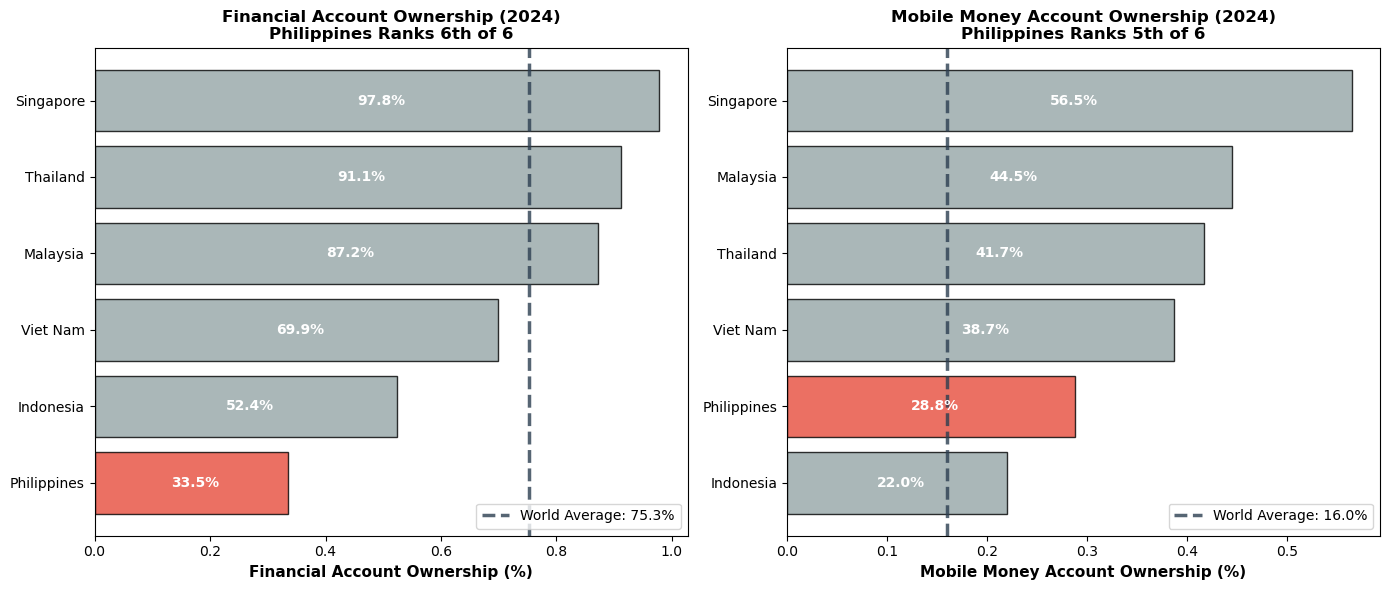

In [50]:
#Creating horizontal bar charts for comparison (side-by-side)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ax1, ax2 = axes

#Get world averages:
world_fi = df_2024_world['fiaccount_t_d'].values[0]
world_mobile = df_2024_world['mobileaccount_t_d'].values[0]

#Colors for FI Account
colors_fi = get_colors(df_2024_asean_fi)

#FI account percentage bar chart
bar_1 = ax1.barh(df_2024_asean_fi['countrynewwb'], df_2024_asean_fi['fiaccount_t_d'],
         color=colors_fi, alpha=0.8, edgecolor='black', linewidth=1)

#World average line
ax1.axvline(world_fi, color=WORLD_COLOR, linestyle='--',
           linewidth=2.5, label=f'World Average: {world_fi:.1%}', alpha=0.8)

#Formatting
ax1.set_xlabel('Financial Account Ownership (%)', fontweight='bold', fontsize=11)
ax1.bar_label(bar_1, fmt=lambda x: f'{x:.1%}', padding=3, label_type='center',
             color='white', fontweight='bold')
ax1.set_title('Financial Account Ownership (2024)\nPhilippines Ranks 6th of 6',
              fontweight='bold', fontsize=12)

ax1.legend(loc='lower right')

#Colors for Mobile account
colors_mobile = get_colors(df_2024_asean_mobile)

#Mobile account percentage bar chart
bar_2 = ax2.barh(df_2024_asean_mobile['countrynewwb'], df_2024_asean_mobile['mobileaccount_t_d'],
         color=colors_mobile, alpha=0.8, edgecolor='black', linewidth=1)
ax2.axvline(world_mobile, color=WORLD_COLOR, linestyle='--',
            linewidth=2.5, label=f'World Average: {world_mobile:.1%}', alpha=0.8)
ax2.set_xlabel('Mobile Money Account Ownership (%)', fontweight='bold', fontsize=11)
ax2.bar_label(bar_2, fmt=lambda x: f'{x:.1%}', padding=3, label_type='center',
             color='white', fontweight='bold')
ax2.set_title('Mobile Money Account Ownership (2024)\nPhilippines Ranks 5th of 6',
              fontweight='bold', fontsize=12)

ax2.legend(loc='lower right')

plt.tight_layout()

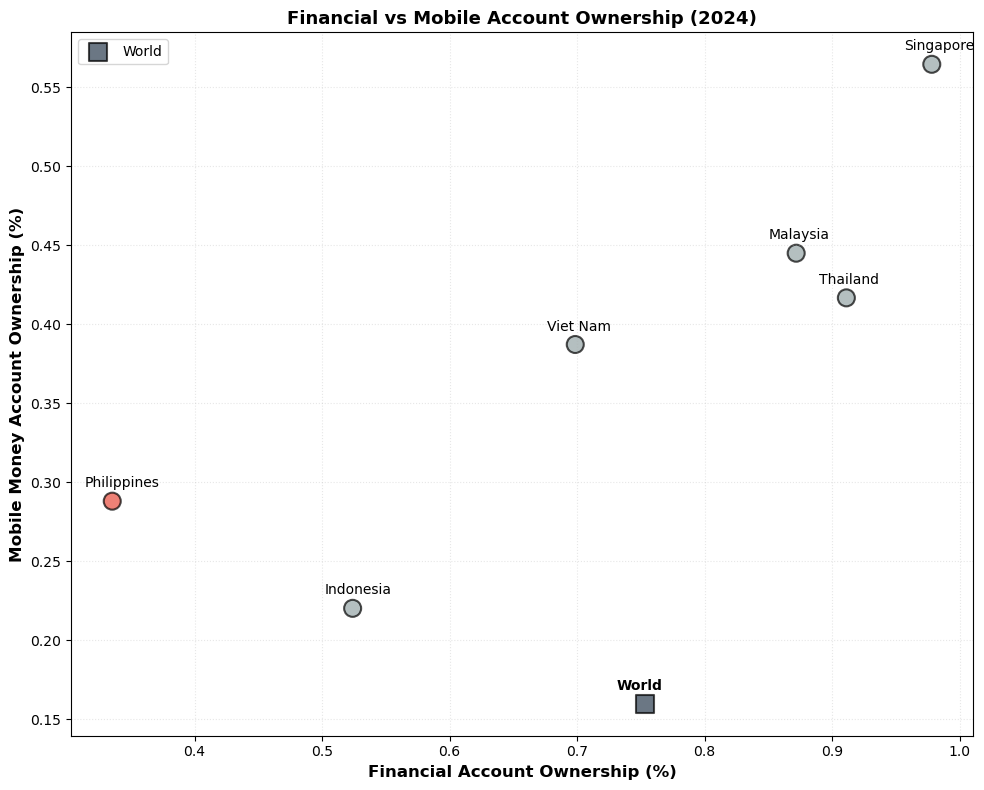

In [51]:
fig, ax = plt.subplots(figsize=(10, 8))

#Get colors
colors_scatter = get_colors(df_2024_asean)

#Asean countries
ax.scatter(df_2024_asean['fiaccount_t_d'], df_2024_asean['mobileaccount_t_d'],
           alpha=0.7, c=colors_scatter, edgecolor='black', s=150,
           linewidth=1.5)

#Plot world 2024
ax.scatter(df_2024_world['fiaccount_t_d'], df_2024_world['mobileaccount_t_d'],
           alpha=0.7, c=WORLD_COLOR, edgecolor='black', s=150, marker='s',
           label='World', linewidth=1.5)

#Country labels
for index, row in df_2024_asean.iterrows():
    ax.annotate(row['countrynewwb'],
                xy=(row['fiaccount_t_d'], row['mobileaccount_t_d']),
                xytext=(-20,10),
                textcoords='offset points',
                fontsize=10)

# Add World label
ax.annotate('World',
            xy=(df_2024_world['fiaccount_t_d'].values[0],
                df_2024_world['mobileaccount_t_d'].values[0]),
            xytext=(-20, 10), textcoords='offset points',
            fontsize=10, fontweight='bold')

# Formatting
ax.set_xlabel('Financial Account Ownership (%)', fontweight='bold', fontsize=12)
ax.set_ylabel('Mobile Money Account Ownership (%)', fontweight='bold', fontsize=12)
ax.set_title('Financial vs Mobile Account Ownership (2024)',
             fontweight='bold', fontsize=13)

ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.8)
ax.legend(loc='best', fontsize=10)

plt.tight_layout()

**Observations**
1. When it comes to Financial Account ownership, the Philippines ranks last among the ASEAN 5 countries + Singapore and with a large margin as well. Even more startling is the fact that our country around **42 percentage points below the global average**. In our Philippines deep-dive section, we will explore the structural and behavioral factors contributing to this significant gap.
2. When it comes to mobile account ownership, the Philippines has fared slightly better, ranking 5th out of 6th among ASEAN 5 countries + Singapore, and performing around **13 percentage points above the average**. This signals that mobile technology could be having a positive effect in enabling financialy underserved Filipinos.
3. The scatter plot reveals a positive correlation between financial account and mobile account money ownership across ASEAN 5 countries + Singapore. The Philippines' position on the lower left quadrant indicates that it lags in both dimensions, strengthening the suggestion that there is significant room for growth in overall financial inclusion.

### Financial Account Ownership in the Last 10 Years

In [52]:
#Get historical FI progression for ASEAN
df_asean = df_filtered[df_filtered['countrynewwb'] != 'World'].copy()
df_world = df_filtered[df_filtered['countrynewwb'] == 'World'].copy()

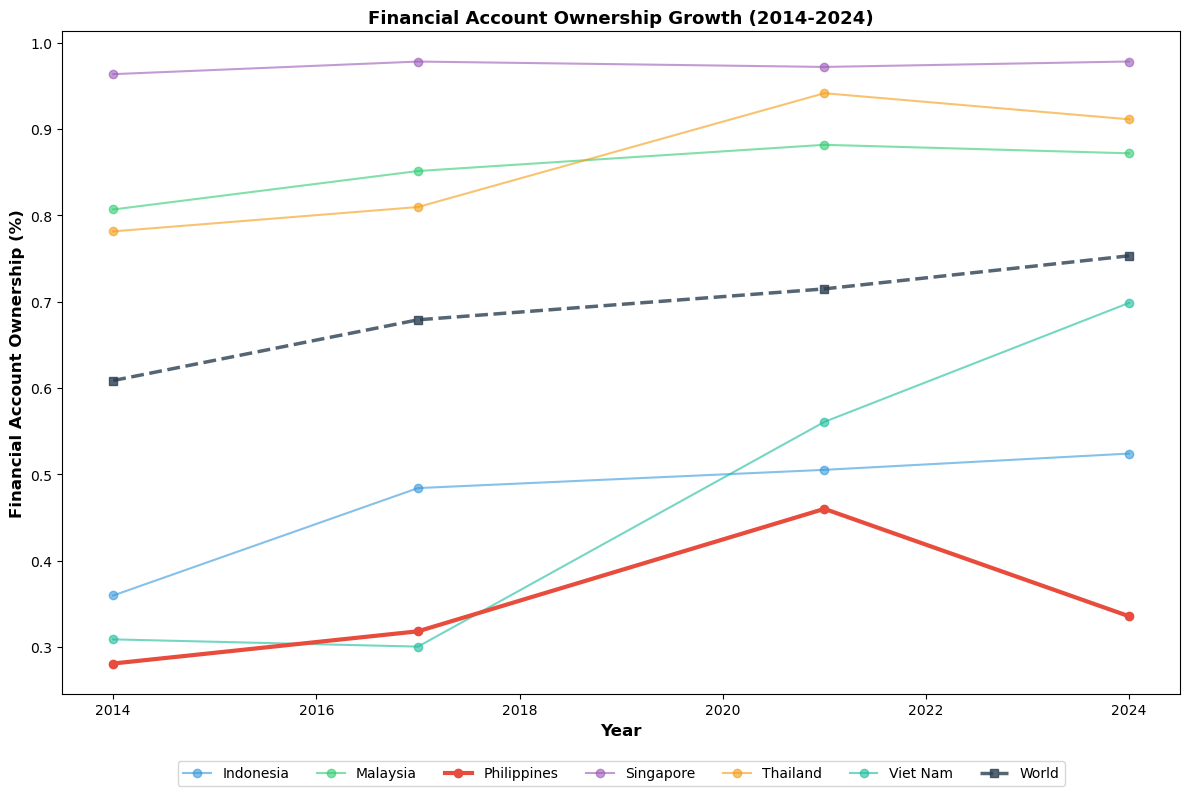

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))

#Plot lines for each country
for country in df_asean['countrynewwb'].unique():
    country_data = df_asean[df_asean['countrynewwb'] == country].sort_values('year')
    color = get_country_color(country)

    if country == 'Philippines':
        linewidth = 3
        alpha = 1.0
        zorder = 3
    else:
        linewidth = 1.5
        alpha = 0.6
        zorder = 2

    ax.plot(country_data['year'], country_data['fiaccount_t_d'],
            marker='o', linewidth=linewidth, alpha=alpha, color=color,
            label=country, zorder=zorder)

# Plot World average
ax.plot(df_world['year'], df_world['fiaccount_t_d'],
        marker='s', linewidth=2.5, color=WORLD_COLOR, linestyle='--',
        label='World', alpha=0.8, zorder=4)

# Formatting
ax.set_xlabel('Year', fontweight='bold', fontsize=12)
ax.set_ylabel('Financial Account Ownership (%)', fontweight='bold', fontsize=12)
ax.set_title('Financial Account Ownership Growth (2014-2024)',
             fontweight='bold', fontsize=13)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncols=7, fontsize=10)

plt.tight_layout()

**Observations**:

The Philippines exhibits a concerning pattern: financial account ownership grew from 28% (2014) to 46% (2021), but then sharply declined in 2024. This percentage drop is anomalous among all other ASEAN 5 countries and Singapore. Indonesia and Vietnam, in particular, demonstrate sustained growth trajectories, suggesting the Philippines faces unique challenges in retaining banked populations.

### Mobile Account Ownership in the Last 10 Years

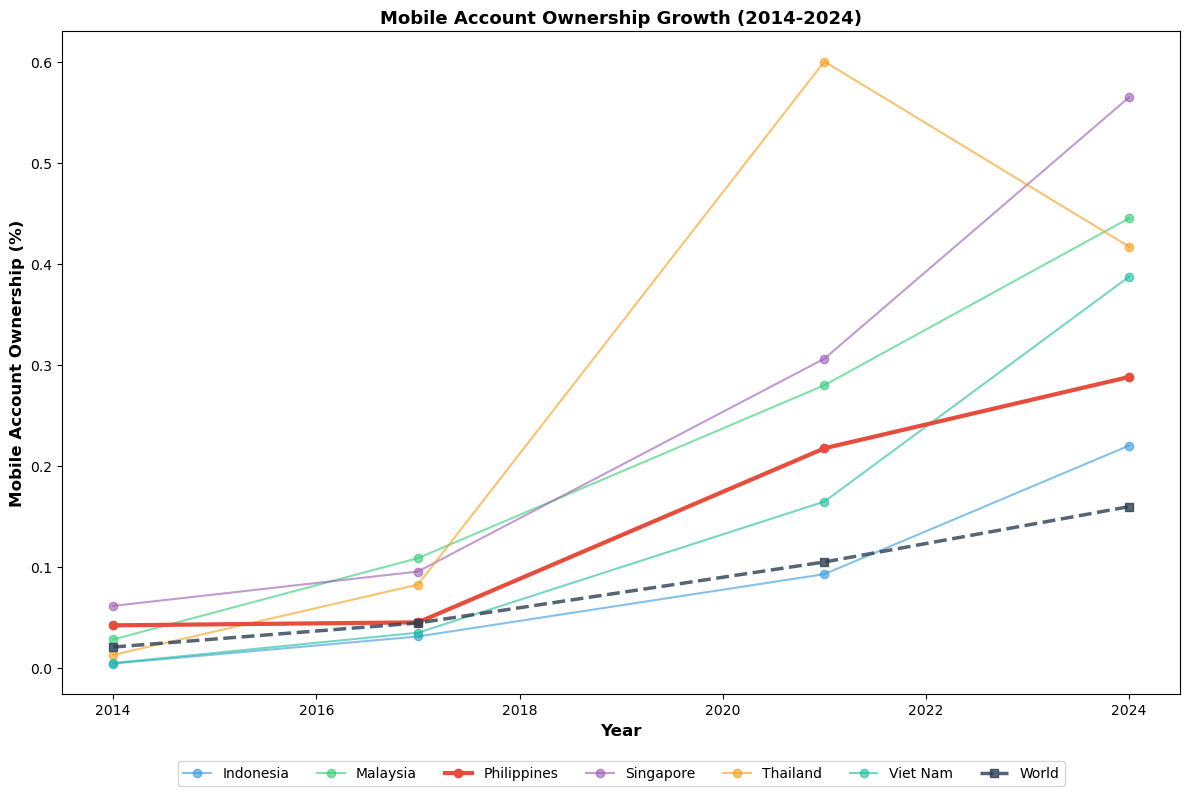

In [54]:
# MOBILE ACCOUNT OWNERSHIP IN THE LAST 10 YEARS
fig, ax = plt.subplots(figsize=(12, 8))

#Plot lines for each country
for country in df_asean['countrynewwb'].unique():
    country_data = df_asean[df_asean['countrynewwb'] == country].sort_values('year')
    color = get_country_color(country)

    if country == 'Philippines':
        linewidth = 3
        alpha = 1.0
        zorder = 3
    else:
        linewidth = 1.5
        alpha = 0.6
        zorder = 2

    ax.plot(country_data['year'], country_data['mobileaccount_t_d'],
            marker='o', linewidth=linewidth, alpha=alpha, color=color,
            label=country, zorder=zorder)

# Plot World average
ax.plot(df_world['year'], df_world['mobileaccount_t_d'],
        marker='s', linewidth=2.5, color=WORLD_COLOR, linestyle='--',
        label='World', alpha=0.8, zorder=4)

# Formatting
ax.set_xlabel('Year', fontweight='bold', fontsize=12)
ax.set_ylabel('Mobile Account Ownership (%)', fontweight='bold', fontsize=12)
ax.set_title('Mobile Account Ownership Growth (2014-2024)',
             fontweight='bold', fontsize=13)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncols=7, fontsize=10)

plt.tight_layout()

**Observations**

On the other hand, mobile account ownership presents a more encouraging picture for the Philippines. Unlike the volatility observed in financial account ownership, mobile account adoption shows steady, uninterrupted growth in the last 10 years. The Philippines outpaces both Indonesia and the world average, demonstrating that digital financial solutions may be more effective at reaching and retaining Filipino users than traditional banking infrastructure.

### Summary
The Philippines tell a unique story about its history of financial inclusion in the last 10 years. In some ways, it shows a **tale of two financial systems**: in traditional banking, the Philippines rank last among ASEAN 5 and Singapore, and performing severely below the global average. However, in mobile account ownership, the Philippines has exhibited steady growth in the last 10 years, even outperforming the global average.

This tells us that digital financial solutions might be the more viable pathway for expanding financial inclusion in the country. But to fully understand why traditional banking struggles while mobile money succeeds, we need to examine the underlying financial behaviors and attitudes of Filipinos.

We will explore these in the following sections.

## Understanding Financial Behaviors: Philippines vs ASEAN 6

### Analysis of ASEAN 6 Spending Behavior

This section analyzes the spending behavior across the ASEAN-6, focusing on three key spend-related features. Emphasis is placed on the Philippines, examining its usage trends and performance in comparison with neighboring countries.

The following features were pre-selected to explore and compare spending behavior across ASEAN 6:

*   **g20.made** : Made a digital payment (%, age 15+)
*   **fin22g** : Used a credit card (%, age 15+)
*   **fin26b** : Used a mobile phone or the internet to buy something online (%, age 15+)




#### ASEAN-6 Spending Trends

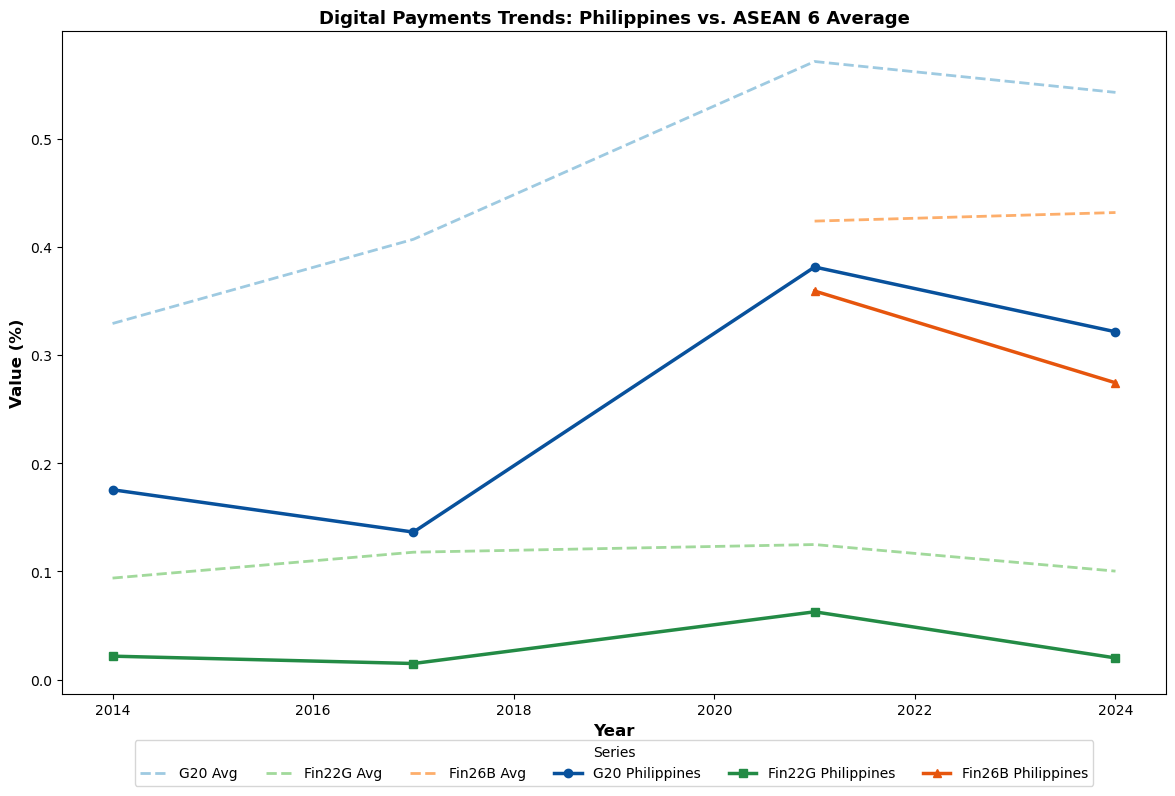

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))

# --- Compute averages (ASEAN-level) ---
avg_data = df_filtered.groupby('year')[['g20_made', 'fin22g', 'fin26b']].mean().reset_index()

# --- Filter Philippines data ---
ph_data = df_filtered[df_filtered['countrynewwb'] == 'Philippines']

# --- Plot ASEAN averages (lighter colors) ---
ax.plot(avg_data['year'], avg_data['g20_made'], color='#9ecae1', linestyle='--', linewidth=2, label='G20 Avg')
ax.plot(avg_data['year'], avg_data['fin22g'], color='#a1d99b', linestyle='--', linewidth=2, label='Fin22G Avg')
ax.plot(avg_data['year'], avg_data['fin26b'], color='#fdae6b', linestyle='--', linewidth=2, label='Fin26B Avg')

# --- Plot Philippines lines (darker colors) ---
ax.plot(ph_data['year'], ph_data['g20_made'], color='#08519c', marker='o', linewidth=2.5, label='G20 Philippines')
ax.plot(ph_data['year'], ph_data['fin22g'], color='#238b45', marker='s', linewidth=2.5, label='Fin22G Philippines')
ax.plot(ph_data['year'], ph_data['fin26b'], color='#e6550d', marker='^', linewidth=2.5, label='Fin26B Philippines')

# --- Formatting ---
ax.set_xlabel('Year', fontweight='bold', fontsize=12)
ax.set_ylabel('Value (%)', fontweight='bold', fontsize=12)
ax.set_title('Digital Payments Trends: Philippines vs. ASEAN 6 Average', fontweight='bold', fontsize=13)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncols=7, fontsize=10, title='Series')
plt.tight_layout()

**Observations**:
*   **G20 Philippines (Dark Blue Solid Line)** : This metric shows significant volatility and growth. It started at about 0.18 in 2014 and dipped slightly by 2016.The largest increase occurred between 2016 and 2021, peaking around 0.38 in 2021 (during pandemic period). It shows a slight decline from 2021 to the projected 2024 value of around 0.33 (post pandemic periond).

*   **Fin26B Philippines (Orange Solid Line)**: This follows a similar shape to the G20 Philippines metric but is consistently lower.It peaks at about 0.36 in 2021 and declines to the projected 2024 value of around 0.28.

*   **Fin22G Philippines (Dark Green Solid Line)**: Remains very low across the entire period (2014-2024), consistently hovering below 0.07 and showing only minor fluctuations. This indicates minimal digital payments activity in this category.

#### Digital Payments of Filipinos

**The percentage of respondents who report using mobile money, a debit or credit card, or a mobile phone to make a payment from an account**; or who report using the internet to pay bills or to buy something online or in a store in the past year. This includes respondents who report paying bills or sending remittances directly from a bank or similar financial institution account or through a mobile money account in the past year.

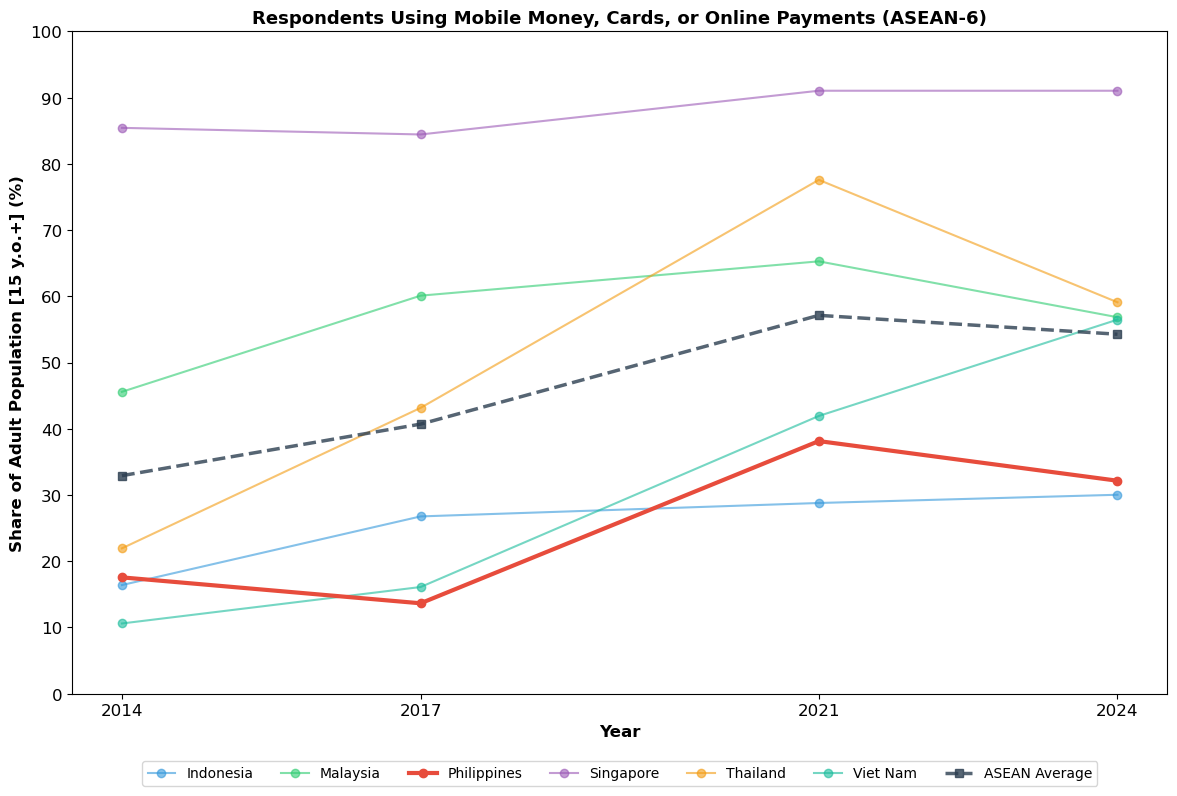

Respondents Using Mobile Money, Cards, or Online Payments


year,countrynewwb,2014,2017,2021,2024,average,17vs14 % Change,21vs17 % Change,24vs21 % Change
0,Indonesia,16.39,26.76,28.79,30.03,25.49,63.23,7.58,4.32
1,Malaysia,45.57,60.10,65.28,56.84,56.95,31.87,8.62,-12.93
2,Philippines,17.55,13.64,38.13,32.15,25.37,-22.30,179.59,-15.70
3,Singapore,85.44,84.44,91.04,91.04,87.99,-1.17,7.82,0.00
4,Thailand,21.94,43.15,77.58,59.10,50.44,96.71,79.79,-23.83
5,Viet Nam,10.59,16.10,41.93,56.47,31.27,51.96,160.46,34.69


Average across Years (%)


year,index,2014,2017,2021,2024,average,17vs14 % Change,21vs17 % Change,24vs21 % Change
0,g20_made,32.91,40.70,57.12,54.27,46.25,23.64,40.37,-5.00


In [56]:
compare_over_time(df_filtered, 'g20_made', 'Respondents Using Mobile Money, Cards, or Online Payments', 4, 100)

**Observations**

*  Overall Trajectory	- Slow start, **dramatic mid-period surge (2018–2022)**, and a recent reversal/decline.
*  Position vs. Peers - Consistently in the bottom two (along with Indonesia), demonstrating the **slowest overall adoption of digital payments compared to the rest of the ASEAN 6** over the decade.
*  Position vs. Average	- Always below the ASEAN 6 average, **indicating a need for accelerated adoption to catch up with the region**. We can also note that Philippines is late in terms of using digital payments compared to countries like Malaysia and Singapore, their usage greatly skewed the average.
*  Peak Performance - 	**The largest percentage point increase occurred between 2018 and 2022 (COVID period)**, suggesting a critical period of accelerated digital transformation took place. Which makes sense since lock downs was in place but transactions still needed to take place.
*  Key takeaway - In terms of digital payments PH is on the bottom tier countries utilizing this feature, but **shows promising potential given the suddden surge displaying its capability**.The sudden surge can be linked to COVID where in lockdowns where in place accross the country and transactions needed to be done digitally. After peaking, growth has slightly declined, indicating market saturation and normalization of consumer behavior as in-person transactions resumed.

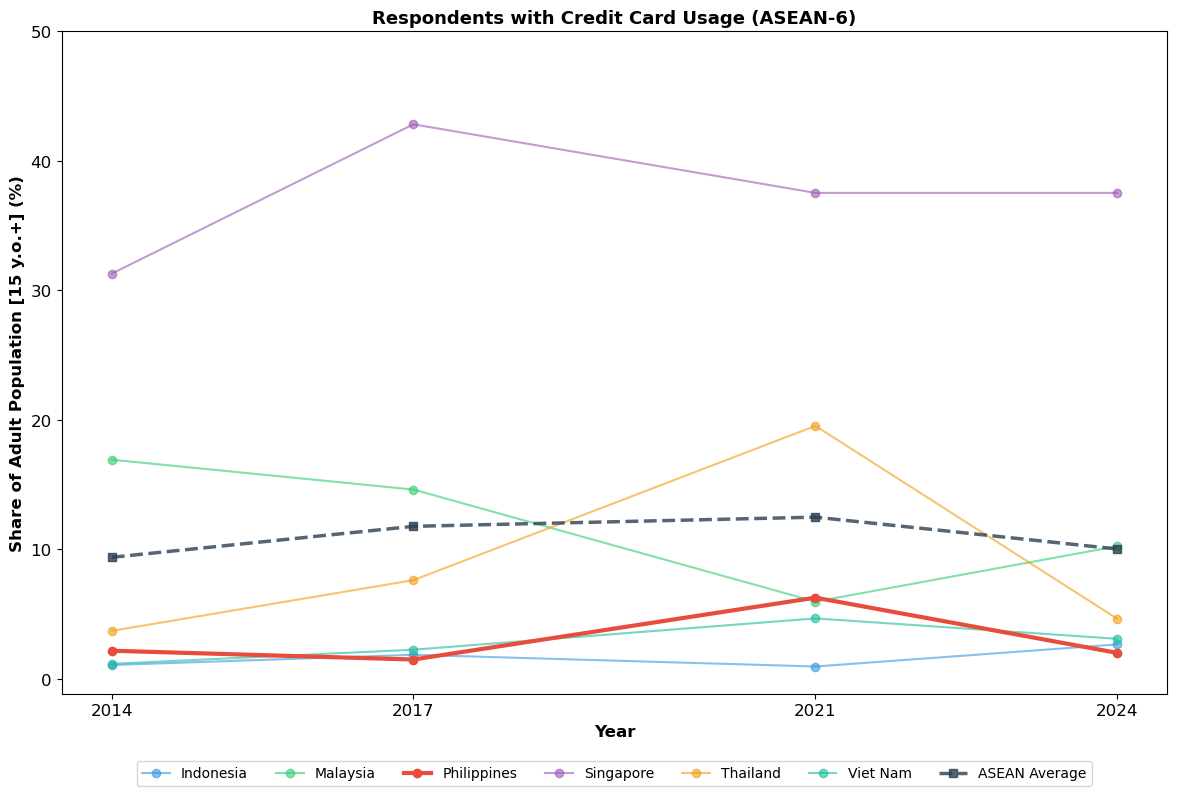

Respondents with Credit Card Usage


year,countrynewwb,2014,2017,2021,2024,average,17vs14 % Change,21vs17 % Change,24vs21 % Change
0,Indonesia,1.07,1.86,0.96,2.66,1.64,73.80,-48.61,177.82
1,Malaysia,16.93,14.62,5.97,10.24,11.94,-13.61,-59.20,71.68
2,Philippines,2.18,1.50,6.27,2.01,2.99,-31.22,319.33,-67.95
3,Singapore,31.30,42.83,37.53,37.53,37.30,36.84,-12.37,0.00
4,Thailand,3.71,7.62,19.54,4.66,8.88,105.54,156.30,-76.17
5,Viet Nam,1.16,2.25,4.67,3.10,2.80,93.74,107.20,-33.67


Average across Years (%)


year,index,2014,2017,2021,2024,average,17vs14 % Change,21vs17 % Change,24vs21 % Change
0,fin22g,9.39,11.78,12.49,10.03,10.92,25.46,6.01,-19.67


In [57]:
compare_over_time(df_filtered, 'fin22g', 'Respondents with Credit Card Usage', 4, 50)

#### Credit Card Usage of Filipinos
The percentage of respondents who report **using their own credit card in the past year**.

**Observations**

*   Overall Trajectory	- **Flat and Stagnant**. Credit card ownership remained consistently at the lowest end of the spectrum, where the Philippines is also a part of. There was no significant mid-period surge or dramatic decline except for Singapore and Thailand.
*   Position vs. Peers	- **Consistently at the Bottom**. The Philippines is usually positioned in the bottom tier, often alongside Vietnam and Indonesia, demonstrating one of the lowest and slowest overall adoption rates compared to the rest of the ASEAN 6 over the entire decade.
*   Position vs. Average	- Always Far Below the ASEAN 6 Average. The country's rate is held down by the massive outlier that is Singapore, and it lags significantly behind the mid-tier of Thailand and Malaysia. This indicates **a significant divide in terms of access to formal credit products**.
*   Peak Performance	No Distinct Peak - Unlike the growth seen in digital wallets, **credit card adoption showed little to no substantial jump**. Any increase during the decade was marginal, suggesting the COVID-19 pandemic did not serve as a catalyst for credit card issuance (it accelerated mobile wallet adoption instead).
*   Key Takeaway	- In the Philippines, **digital financial inclusion is being driven by Mobile Wallets, not traditional credit cards**. Credit card access is largely restricted to the urban, affluent, and high-income segments, keeping the national penetration rate low.

#### Mobile and Online Purchases of Filipinos
The percentage of respondents who report **using a mobile phone or the internet to buy something online in the past year**.

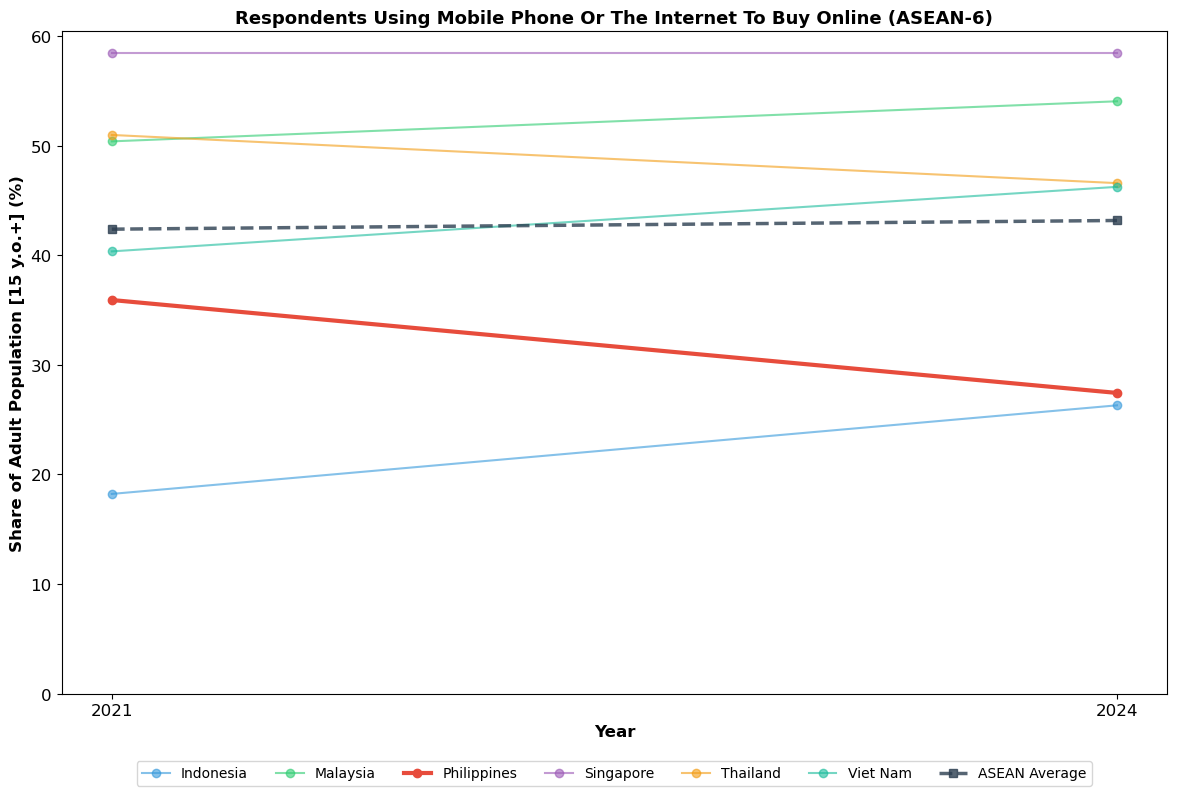

Respondents Using Mobile Phone Or The Internet To Buy Online


year,countrynewwb,2021,2024,average,24vs21 % Change
0,Indonesia,18.22,26.30,22.26,44.36
1,Malaysia,50.39,54.05,52.22,7.26
2,Philippines,35.91,27.44,31.67,-23.61
3,Singapore,58.41,58.41,58.41,0.00
4,Thailand,50.97,46.58,48.78,-8.63
5,Viet Nam,40.35,46.24,43.29,14.59


Average across Years (%)


year,index,2021,2024,average,24vs21 % Change
0,fin26b,42.38,43.17,42.77,1.87


In [58]:
#Filter out 2014 and 2017
df_filtered2 = df_filtered[~df_filtered['year'].isin([2014, 2017])]

compare_over_time(df_filtered, 'fin26b', 'Respondents Using Mobile Phone Or The Internet To Buy Online', 2, 60)

**Observations**

*  Overall Trajectory	- Flat and Stagnant across all countries, **no significant movement was noted**.
*  Position vs. Peers	- Consistently at the Bottom. The Philippines is usually positioned in the bottom tier, often alongside Vietnam and Indonesia, **demonstrating one of the lowest and slowest overall adoption rates compared to the rest of the ASEAN 6 over the entire decade**.
*  Position vs. Average	-  The country is still below the average among the performance of its neighboring countries.
*  Key Takeaway	- In the Philippines, growth has slightly declined, indicating market saturation and normalization of consumer behavior as in-person transactions resumed.

#### Summary

**The Philippines is catching up**

*  **The main story is the Philippines' rapid digital payment *(G20 : made a digital payment)* adoption from 2018 to 2021**, closing the gap with the overall ASEAN 6 average.

*  **Big Jump in Digital Payments** *(G20 : made a digital payment)*. The solid dark blue line shows the percentage of Filipinos who made a digital payment shot up dramatically, from under 20% in 2018 to nearly 40% in 2021. This was a huge catch-up moment.

*  **Online Shopping is the Key Driver** *(F26B : used a mobile phone or the internet to buy online)*.Mobile/Online Purchases, the solid orange line, representing mobile/internet purchases, also surged right alongside the G20 line. It peaked at the same time and followed the same slight decline pattern after 2021.

*  This suggests that **buying things online is a major factor in people adopting digital payments** overall.

*  Credit Cards Lag *(Fin22G : used a credit card)*,The Philippines' use of credit cards has remained very low (solid dark green line) and essentially flat. This confirms that the **digital payment growth in the Philippines is being driven by mobile wallets/online methods, not traditional credit cards**.

*  All indicators—for both the Philippines and the ASEAN 6 average—show a noticeable drop or leveling off after the 2021 peak.

*  The ASEAN 6 averages (dashed lines) also show a dip after 2021, suggesting a regional trend, possibly a stabilization after the massive, pandemic-driven adoption surge in 2020-2021.

### Analysis of ASEAN 6 Saving Behavior

This section will explore the **saving behavior of ASEAN 6** - specifically on their responses to pre-selected questions covering their Saving Behavior across different types of medium of savings.

The following questions were pre-selected to explore and compare saving behavior across ASEAN 6:

- <b>fin17a</b>: Saved at a bank or similar financial institution (%, age 15+)
- <b>fin17b</b>: Saved money using a mobile money account (%, age 15+)
- <b>fin17c</b>: Saved using a savings club or a person outside the family (%, age 15+)

Each question aims to capture the usage across ASEAN the various saving media. Does a certain country prefer to save in traditional, low-risk, but high-requirements banks or financial institutions? Or do they prefer the innovation and mobility mobile money accounts offer? Or does the region prefer to save using the least regulated organizations or people like savings clubs (e.g., paluwagan, cooperatives) and with non-family members?

*Survey Questions </i>*
- *Banks/ Financial Institutions: "In the PAST 12 MONTHS, have you saved or set aside any money by using an account at a bank or similar financial institution?"*
- *Money Wallets: "In the PAST 12 MONTHS, have you saved or set aside any money by using a mobile money account"*
- *Savings Clubs: "In the PAST 12 MONTHS, have you saved or set aside any money using an informal savings group/club such as a merry-go-round or a burial society, VICOBA or a person outside the family"*

In [59]:
#Analysis Preparation
df_all_prep = df_filtered[df_filtered['group']=='all']



#### ASEAN-6 Saving Trends

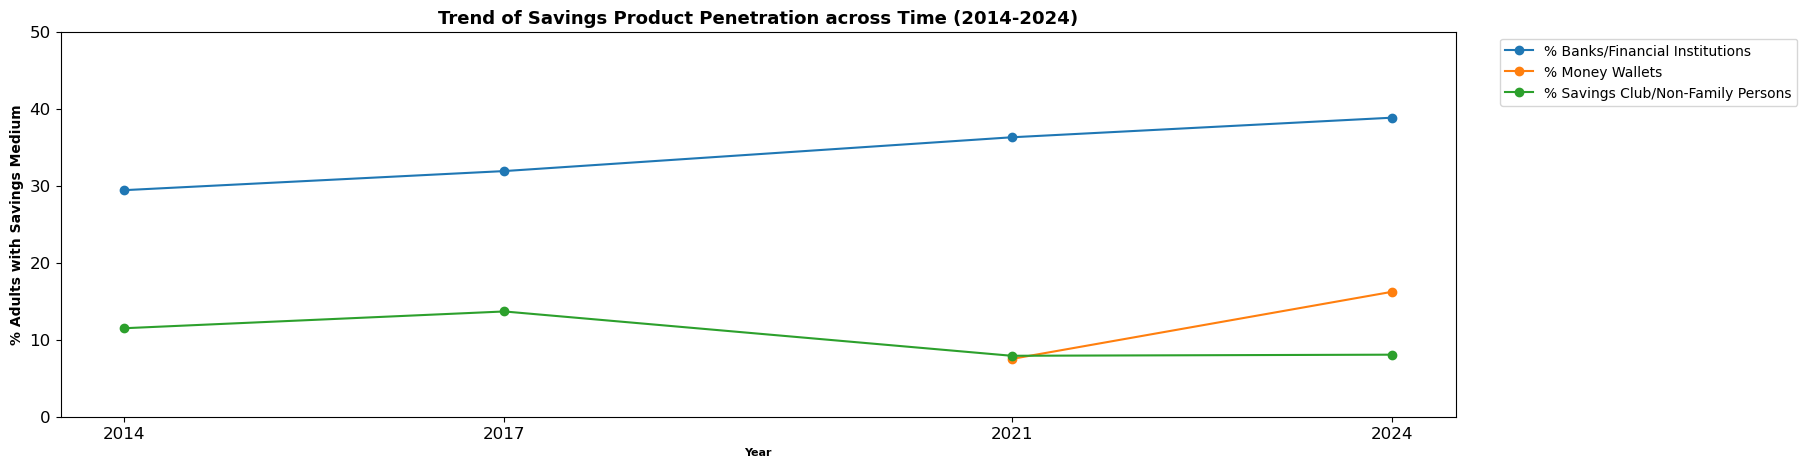

Comparison Adult Savings Medium across Time         
(% Population Penetration)


year,2014,2017,2021,2024,17vs14 % Change,21vs17 % Change,24vs21 % Change
% Banks/Financial Institutions,29.42,31.90,36.29,38.84,8.44,13.75,7.02
% Money Wallets,NaN,NaN,7.50,16.23,NaN,NaN,116.28
% Savings Club/Non-Family Persons,11.49,13.67,7.92,8.06,18.97,-42.10,1.80


In [60]:
# data preparation
df_all = df_filtered.copy()
df_average = df_all.pivot_table(index='year',\
                                values=['fin17a','fin17b','fin17c'],\
                                aggfunc='mean', \
                                sort=True)*100

df_average.columns = ['% Banks/Financial Institutions','% Money Wallets','% Savings Club/Non-Family Persons']
df_average

# chart prepartion
fig, ax = plt.subplots(figsize=(18, 5))
ax.plot(df_average, marker='o')

ax.set_title('Trend of Savings Product Penetration across Time (2014-2024)', \
             fontweight='bold',\
             fontsize=13)

ax.set_xlabel('Year',\
              fontweight='bold',\
              fontsize=8)

ax.set_ylabel('% Adults with Savings Medium', fontweight='bold', fontsize=10)

# add_labels(list(df_average.columns), df_average.index)

plt.xticks((2014, 2017, 2021, 2024),\
           fontsize = 12)

plt.yticks(range(0,60,10),\
           fontsize=12)

plt.legend(list(df_average.columns),\
           bbox_to_anchor=(1.25, 1),\
           fontsize=10)


plt.show()

# table summary
df_overview = df_average.sort_values(by=['year']).transpose()

# display comparison of growth per 3 years
calculate_prct_change(df_overview)

print('Comparison Adult Savings Medium across Time \
        \n(% Population Penetration)')
display(df_overview)

**Observations**

1. Across ASEAN-6, <b>adults saved the most in banks or other financial institutions</b>, with around a third of the region's adults (range of 29% to 38.9%) sharing that they have a savings account with a bank or financial institution in the past decade.
2. On the other hand, <b>only around 10% (range of 7.9% to 13.7%) of ASEAN's adult population reports having their savings in a savings club or with non-family persons </b> in the same period.
3. A rapid growth in usage of money wallets was observed in 3 years, as the <b> percentage of adults using a money wallet as a savings account significantly grew by 116% from 2021 (7.5%) to 2024 (16.2%)</b>.
4. Despite money wallets being a recent innovation, their growth in penetration quickly overtook savings clubs by 2024. By 2024, <b>more adults report to have savings in money wallets (16.2%) rather than savings clubs (8.1%)</b>.
5. However, despite the rapid penetration growth of money wallets as savings accounts, banking and financial institutions remain the dominant medium of savings in ASEAN-6 -despite the rapid penetration growth of money wallets as savings accounts. <b>Banking and financial institutions remain the dominant medium of savings </b> in ASEAN-6.

#### Traditional Bank Account Ownership Among Filipinos

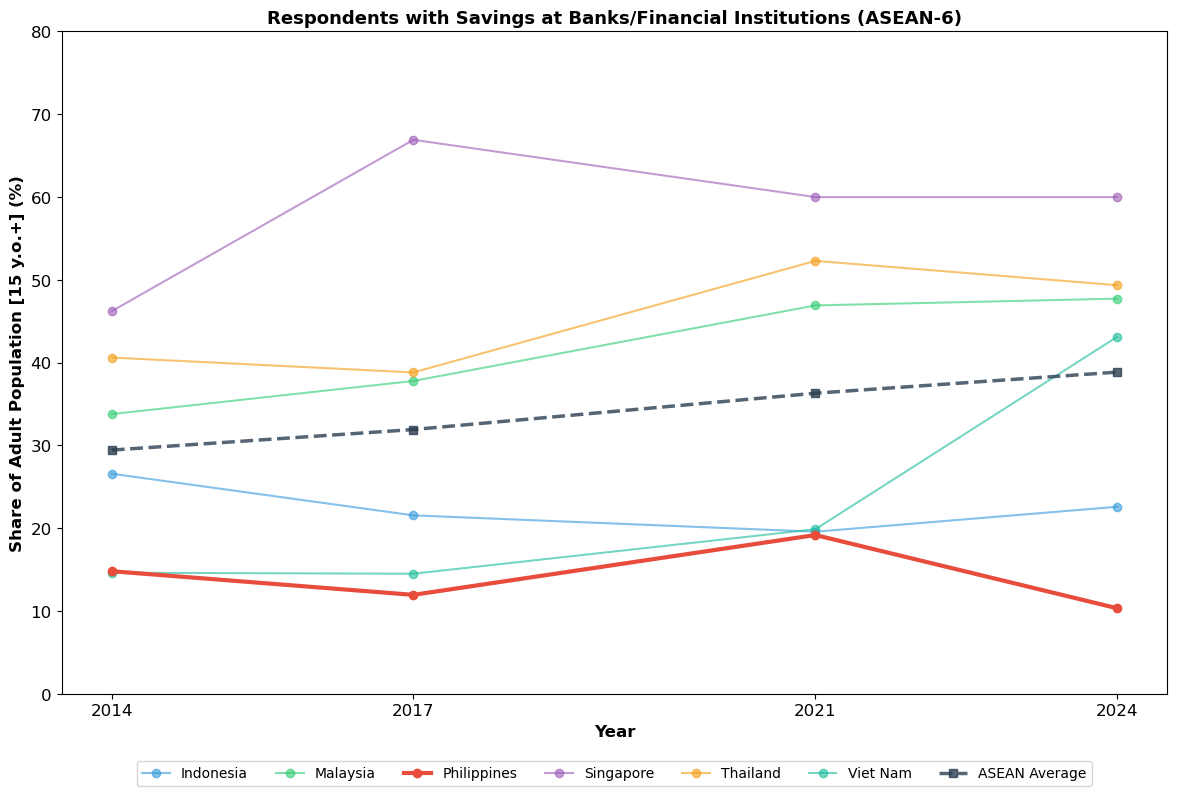

Respondents with Savings at Banks/Financial Institutions


year,countrynewwb,2014,2017,2021,2024,average,17vs14 % Change,21vs17 % Change,24vs21 % Change
0,Indonesia,26.56,21.53,19.56,22.57,22.56,-18.93,-9.17,15.40
1,Malaysia,33.77,37.77,46.90,47.71,41.54,11.84,24.16,1.74
2,Philippines,14.79,11.93,19.16,10.32,14.05,-19.31,60.59,-46.15
3,Singapore,46.21,66.90,59.99,59.99,58.27,44.79,-10.34,0.00
4,Thailand,40.60,38.80,52.28,49.34,45.25,-4.42,34.74,-5.62
5,Viet Nam,14.61,14.48,19.86,43.09,23.01,-0.84,37.13,116.96


Average across Years (%)


year,index,2014,2017,2021,2024,average,17vs14 % Change,21vs17 % Change,24vs21 % Change
0,fin17a,29.42,31.90,36.29,38.84,34.11,8.44,13.75,7.02


In [61]:
compare_over_time(df_all, 'fin17a', 'Respondents with Savings at Banks/Financial Institutions', 4, 80)

**Observations**:

1. Over the past decade, **Singapore has significantly led as the country with the highest proportion of its adults who have their savings in a bank/financial institution**. The country with the second-highest savings in bank/financial institutions is Thailand, with an average of half of its adult population holding their savings in a bank/financial institution.
2. Across ASEAN-6, the ranking of penetration remains consistent across the years, except for Viet Nam in 2024. **In 2024, Viet Nam's proportion of adults holding their savings in a bank/financial institution shot up by 116% from 2021**, not just overtaking Indonesia by rank, but also performing higher than the average of the region in that period (34%)
3. **The Philippines has the lowest proportion of adults who hold their savings in a bank account**. In the past decade, less than 20% of the population has had their savings in a bank/financial institution account. In 2024, the share of adults who had a bank/financial institution savings account declined to 10.3%, **which is the lowest in the past decade**.

#### Mobile Wallet Savings for Filipinos

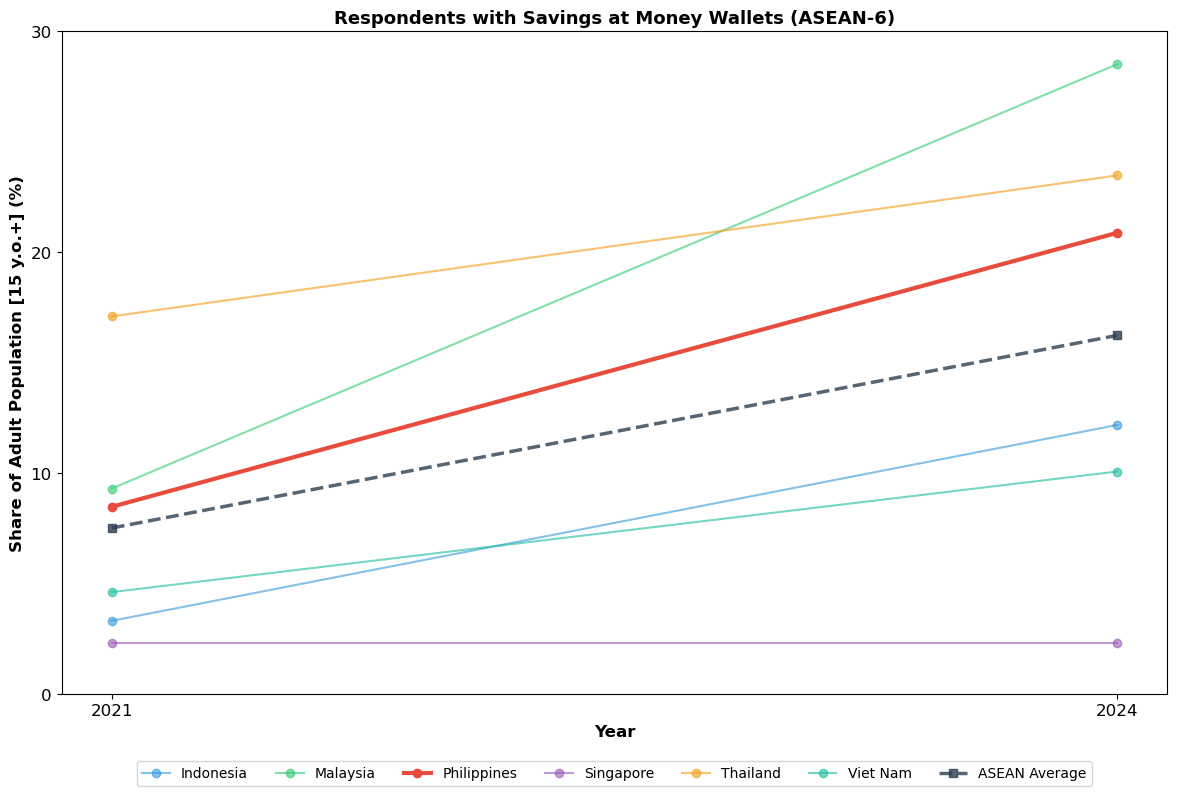

Respondents with Savings at Money Wallets


year,countrynewwb,2021,2024,average,24vs21 % Change
0,Indonesia,3.30,12.17,7.73,268.99
1,Malaysia,9.29,28.51,18.90,206.81
2,Philippines,8.46,20.87,14.67,146.61
3,Singapore,2.27,2.27,2.27,0.00
4,Thailand,17.09,23.47,20.28,37.35
5,Viet Nam,4.60,10.06,7.33,118.81


Average across Years (%)


year,index,2021,2024,average,24vs21 % Change
0,fin17b,7.50,16.23,11.86,116.28


In [62]:
compare_over_time(df_all, 'fin17b', 'Respondents with Savings at Money Wallets', 2, 30)

**Observations**:

1. There was a **boom in the use of money wallets as a savings account** in 2024 from 2021, as the percentage of adults in ASEAN-6 using money wallets for savings grew by 153%.
2. There are **3 countries that have a higher penetration than average in this 2021-2024 period: Thailand, Malaysia, and the Philippines**. In 2024, Malaysia ranked the 1st in proportion of adults using money wallets for savings, with more than a quarter of its population having a savings accounts in a money wallet (28.5%). The next highest country in savings by money wallet in 2024 is Thailand (23%), followed by the Philippines (20%).
3. The remaining countries, have **only about a tenth of their population** using money wallets as a savings account (Singapore: 2%, Indonesia: 12%, Viet Nam: 10%)

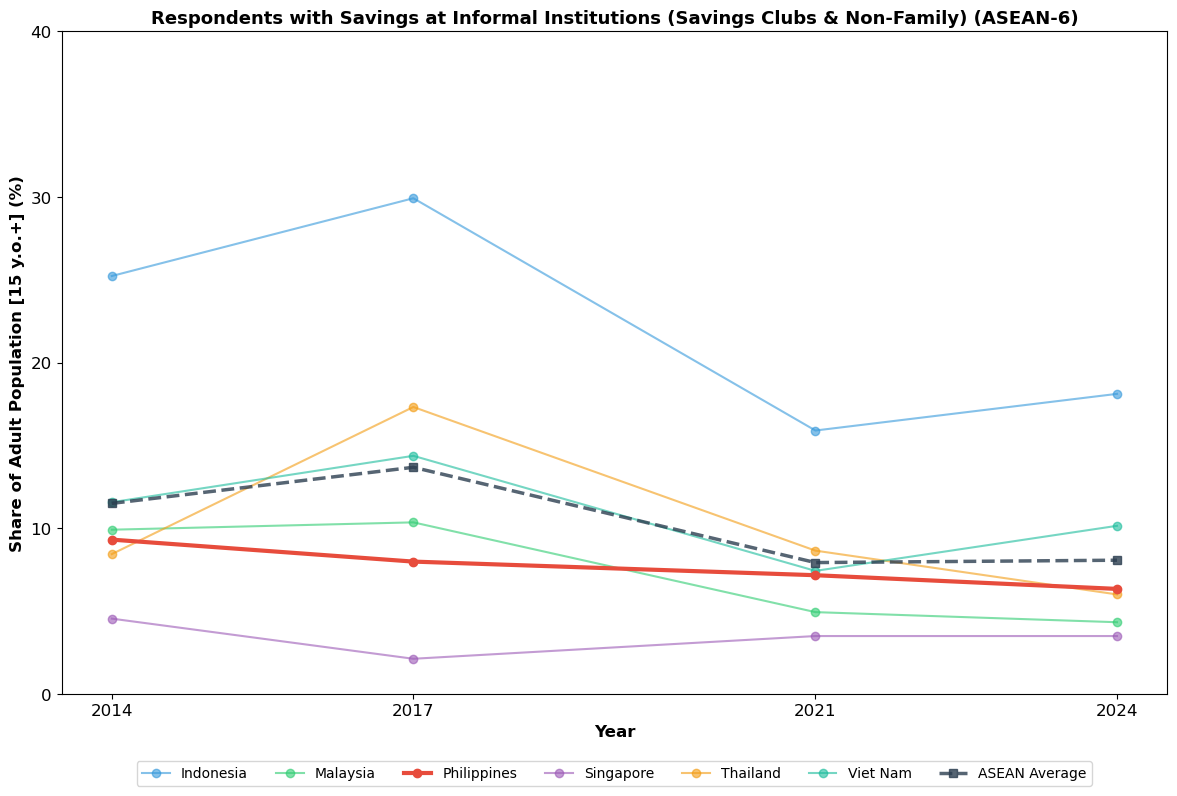

Respondents with Savings at Informal Institutions (Savings Clubs & Non-Family)


year,countrynewwb,2014,2017,2021,2024,average,17vs14 % Change,21vs17 % Change,24vs21 % Change
0,Indonesia,25.23,29.92,15.89,18.11,22.29,18.62,-46.89,13.93
1,Malaysia,9.90,10.34,4.92,4.31,7.37,4.48,-52.42,-12.39
2,Philippines,9.30,7.97,7.15,6.32,7.69,-14.27,-10.32,-11.56
3,Singapore,4.53,2.10,3.48,3.48,3.40,-53.54,65.24,0.00
4,Thailand,8.43,17.31,8.64,5.99,10.09,105.45,-50.11,-30.63
5,Viet Nam,11.56,14.36,7.41,10.14,10.87,24.26,-48.39,36.73


Average across Years (%)


year,index,2014,2017,2021,2024,average,17vs14 % Change,21vs17 % Change,24vs21 % Change
0,fin17c,11.49,13.67,7.92,8.06,10.28,18.97,-42.10,1.80


In [63]:
compare_over_time(df_all, 'fin17c', 'Respondents with Savings at Informal Institutions (Savings Clubs & Non-Family)', 4, 40)

**Observations**:

1. For this informal medium of savings, **Indonesia has had the highest usage in the past decade (22%)**, which is twice the regional average of 10.5%
2. There was a dip in savings through savings clubs/non-family persons from 2017 to 2021. From 2017 to 2021, savings in this medium declined drastically by 42% but picked up by 2024. While the regional average picked up by 13% in 2024, only Viet Nam and Indonesia showed growth, implying that the regional average increase was pulled up largely by Viet Nam's 36% and Indonesia's 13.9% increases. The rest of the countries used less of this saving method. To note, **these 3 countries (Malaysia, Philppines, and Thailand)  whose usage of this informal medium of savings that continued to decline in 2024 are also the top 3 countries whose proportion of adults have a savings account at a money wallet**.
3. For this savings medium, **Singapore has the least penetration of adult usage**, averaging only 3.4% in the past decade (versus regional average of 10.3%)

#### Summary

1. <b> Dominance of Formal and Secured Savings</b>: Generally, the dominant medium of savings is still the most formal and regulated platform: banks and financial institutions.
2. <b> Boom in Digital Savings</b>: While there has been a recent boom in the adoption of digital platforms for savings (mobile wallets), banks and financial institutions remain the top choice of savings medium.
3. <b> ASEAN 6's Diversity in Saving Behavior</b>: While these countries belong in the same region, some countries have distinct savings behaviors and preferences. Singapore has the highest use of savings in banking/financial institutions and the least in informal organizations (i.e., savings clubs, non-family persons). On the other hand, while Indonesia lags in saving through banks and mobile wallets, it has the top use of informal savings options like savings clubs and through non-family persons.
4. <b>PH Shift to Tech Savings</b>: In 2024, the Philippines had the lowest usage of banks and financial institutions for savings. The country also has fewer adults with informal savings (e.g., savings clubs). But, its usage of money wallets for saving has significantly increased (more than doubled) since 2021. This may mean that Filipinos are not jusr quick adopters of new technology for savings, they may be preferring to transfer their savings from both the formal financial institutions and informal groups/people to digital platforms.

### Analysis of ASEAN-6 Borrowing Behavior

This section examines how borrowing behaviors in ASEAN-6 evolved between 2014 and 2024, focusing on formal, mobile, and informal borrowing patterns.

The following questions were pre-selected to examine and compare borrowing behavior across ASEAN 6:

**fin22a**: Borrowed from a formal bank or similar financial institution (%, age 15+).

**fin22a_1**: Borrowed from a mobile money provider (%, age 15+).

**fin22b**: Borrowed from family or friends (%, age 15+).

#### ASEAN-6 Borrowing Trends

In [64]:
# Filtered countries and borrowing variables
df_filtered = df_filtered[df_filtered["year"].between(2014, 2024)]  # filter years (2014-2024)
df_filtered = df_filtered[df_filtered["group"] == "all"]  # filter group to all
df_filtered = df_filtered[df_filtered["countrynewwb"] != "world"]  # filter group to all



# Compute ASEAN-6 average per yer per variable
asean6_avg = (
    df_filtered.groupby("year", as_index=False)[["fin22a", "fin22a_1", "fin22b"]]
    .mean()
)
asean6_avg["countrynewwb"] = "ASEAN-6 Average"

# Combine ASEAN-6 average with country data
df_plot = pd.concat([df_filtered, asean6_avg], ignore_index=True)


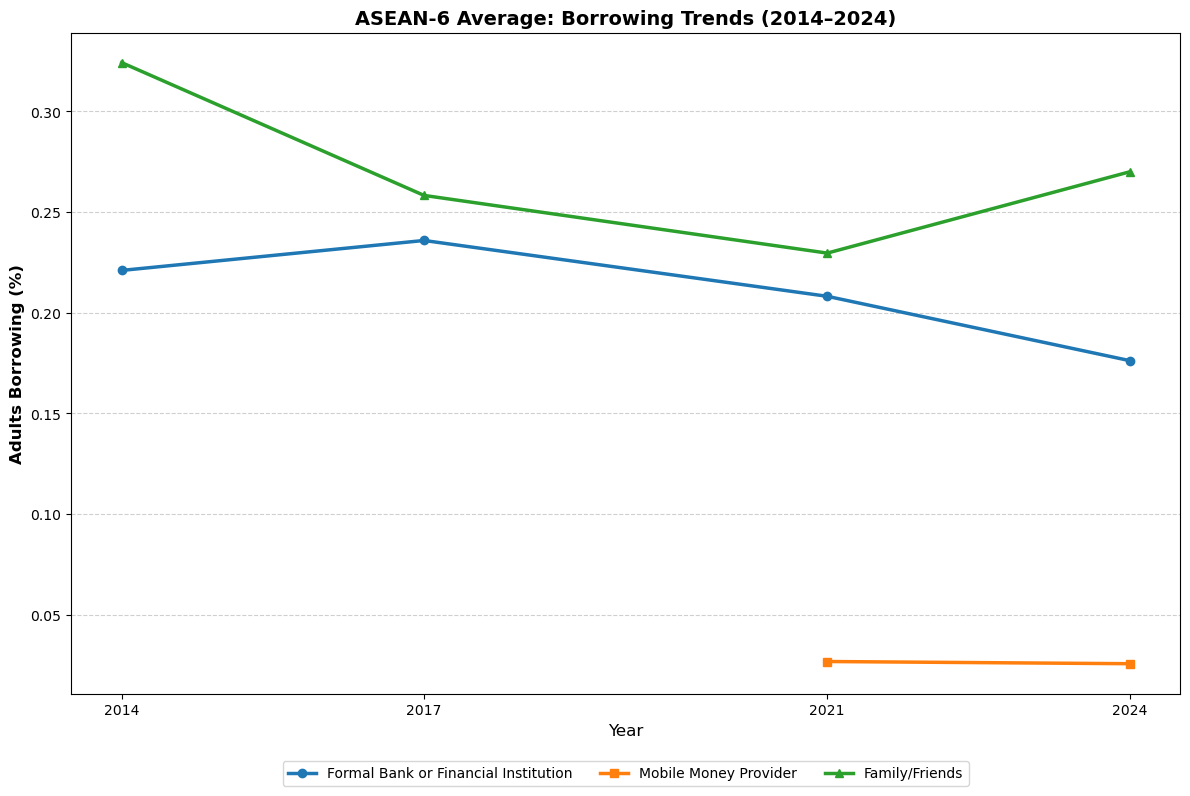

In [65]:
# Plot ASEAN-6 averages for each variable
plt.figure(figsize=(12, 8))

plt.plot(asean6_avg["year"], asean6_avg["fin22a"], marker="o", linewidth=2.5, label="Formal Bank or Financial Institution")
plt.plot(asean6_avg["year"], asean6_avg["fin22a_1"], marker="s", linewidth=2.5, label="Mobile Money Provider")
plt.plot(asean6_avg["year"], asean6_avg["fin22b"], marker="^", linewidth=2.5, label="Family/Friends")

# Formatting
plt.title("ASEAN-6 Average: Borrowing Trends (2014–2024)", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Adults Borrowing (%)", fontsize=12, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(sorted(df_plot["year"].unique()))

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncols=3, fontsize=10)

plt.tight_layout()

**Observations**

*   **Informal borrowing (Family/Friends) remains the most common borrowing source across ASEAN-6**, averaging 30–37% of adults over the past decade. Although it declined from around 37% in 2014 to 27% in 2021, it rebounded slightly to about 32% by 2024, showing that community and trust-based lending remain deeply rooted in financial behavior.
*   **Formal borrowing (Banks/Financial Institutions) shows modest participation**, ranging between 14% and 22%. It peaked slightly around 2017 (about 21%), but then gradually declined to around 15% in 2024, suggesting slow progress in expanding formal credit access or a preference for informal borrowing channels.

*   Borrowing from **Mobile Money Providers is still minimal**, with only 2–3% of adults using this channel since its introduction in 2021. While small, it represents the emerging role of digital finance in expanding credit opportunities—especially in countries with growing fintech adoption.


#### Filipinos Borrowing From Traditional Banks

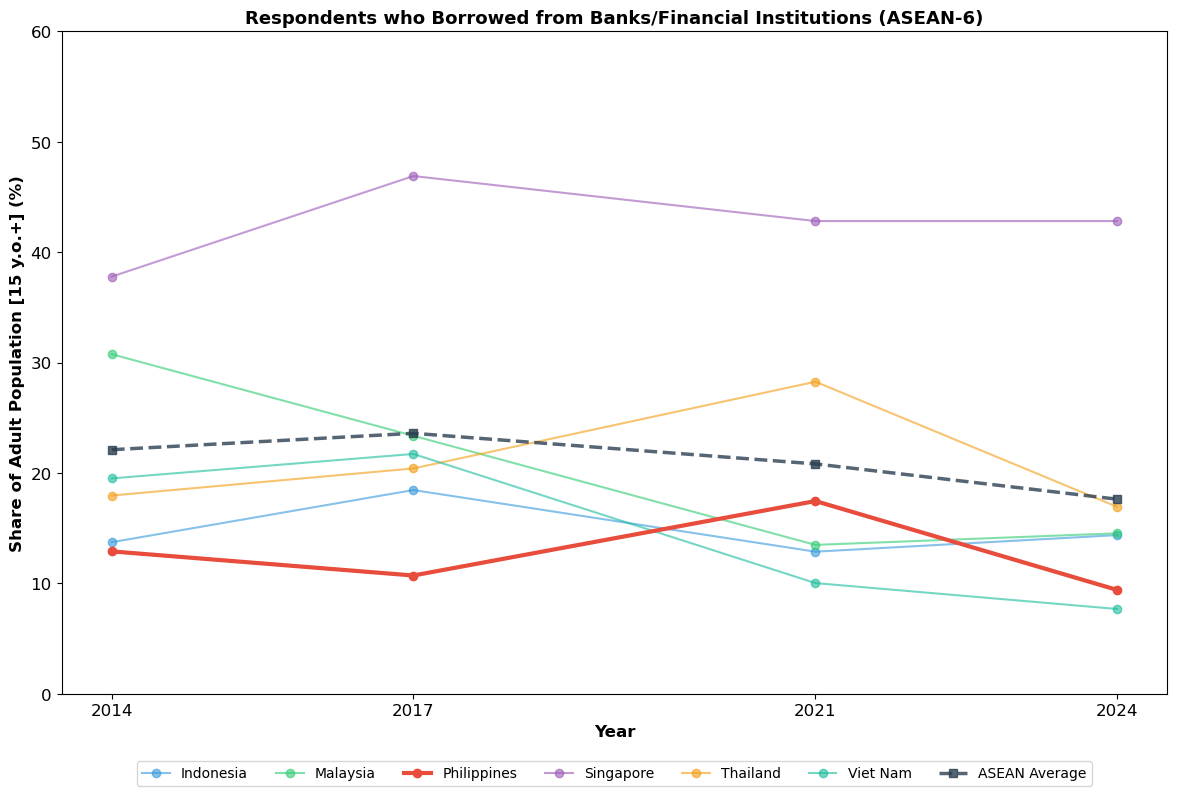

Respondents who Borrowed from Banks/Financial Institutions


year,countrynewwb,2014,2017,2021,2024,average,17vs14 % Change,21vs17 % Change,24vs21 % Change
0,Indonesia,13.72,18.44,12.86,14.36,14.85,34.43,-30.28,11.68
1,Malaysia,30.75,23.36,13.48,14.52,20.53,-24.03,-42.31,7.79
2,Philippines,12.89,10.70,17.45,9.40,12.61,-16.95,63.04,-46.14
3,Singapore,37.78,46.90,42.82,42.82,42.58,24.11,-8.70,0.00
4,Thailand,17.95,20.40,28.26,16.93,20.89,13.66,38.52,-40.08
5,Viet Nam,19.50,21.72,10.02,7.67,14.73,11.35,-53.88,-23.43


Average across Years (%)


year,index,2014,2017,2021,2024,average,17vs14 % Change,21vs17 % Change,24vs21 % Change
0,fin22a,22.10,23.59,20.81,17.62,21.03,6.73,-11.76,-15.35


In [66]:
compare_over_time(df_filtered, "fin22a",'Respondents who Borrowed from Banks/Financial Institutions',4, 60)

**Observations**:


*   Across ASEAN-6, **borrowing from formal banks or financial institutions remained modest and stable**, with around 17% to 23% of adults in the region reporting loans from formal credit sources.  

*   **Singapore consistently showed the highest participation** in formal borrowing (around 38–46%), while the regional average stayed around 20% throughout the decade.

*   Despite emerging financial technologies, **traditional banks remain the dominant source of formal credit**, though overall borrowing levels have not grown significantly.

*   The steady trend reflects that **financial access has improved, but actual borrowing behavior remains conservative**, possibly due to income constraints or limited loan eligibility.














#### Filipinos Borrowing From Mobile Money Providers

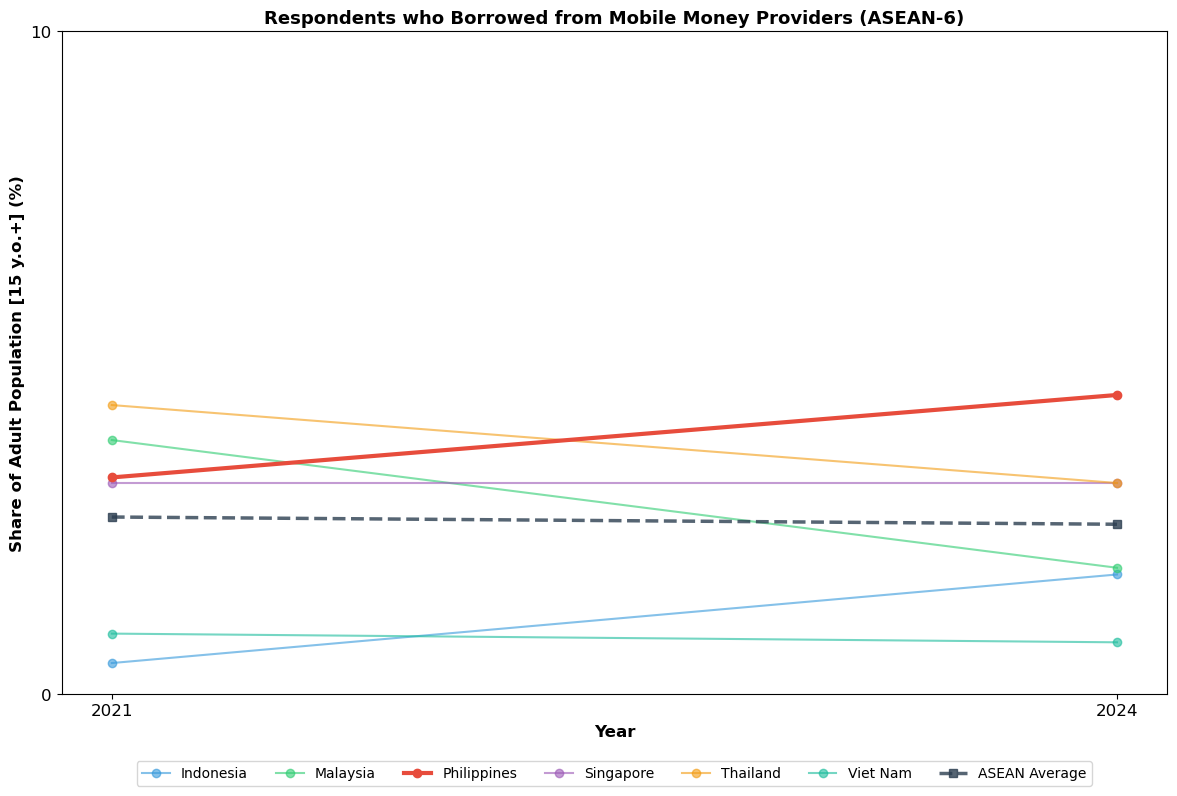

Respondents who Borrowed from Mobile Money Providers


year,countrynewwb,2021,2024,average,24vs21 % Change
0,Indonesia,0.46,1.80,1.13,289.78
1,Malaysia,3.83,1.90,2.86,-50.37
2,Philippines,3.26,4.51,3.89,38.15
3,Singapore,3.18,3.18,3.18,0.00
4,Thailand,4.36,3.18,3.77,-27.01
5,Viet Nam,0.91,0.77,0.84,-14.50


Average across Years (%)


year,index,2021,2024,average,24vs21 % Change
0,fin22a_1,2.67,2.56,2.61,-4.09


In [67]:
compare_over_time(df_filtered, "fin22a_1", 'Respondents who Borrowed from Mobile Money Providers', 2, 10)

**Observations**

*   Borrowing from mobile money providers has gradually increased, rising from around 2% in 2021 to 4–5% in 2024 on average across the region.

*   The regional average shows a steady upward movement, indicating that more adults are beginning to trust and use mobile platforms for short-term borrowing needs.

*   Borrowing through mobile channels remains significantly lower than bank or informal borrowing, showing that digital credit is still in its early stages of adoption.

*   Overall, this gradual rise points to growing digital financial inclusion, with mobile borrowing expected to expand further as digital ecosystems mature and smartphone use widens.

#### Filipinos Borrowing from Informal Sources

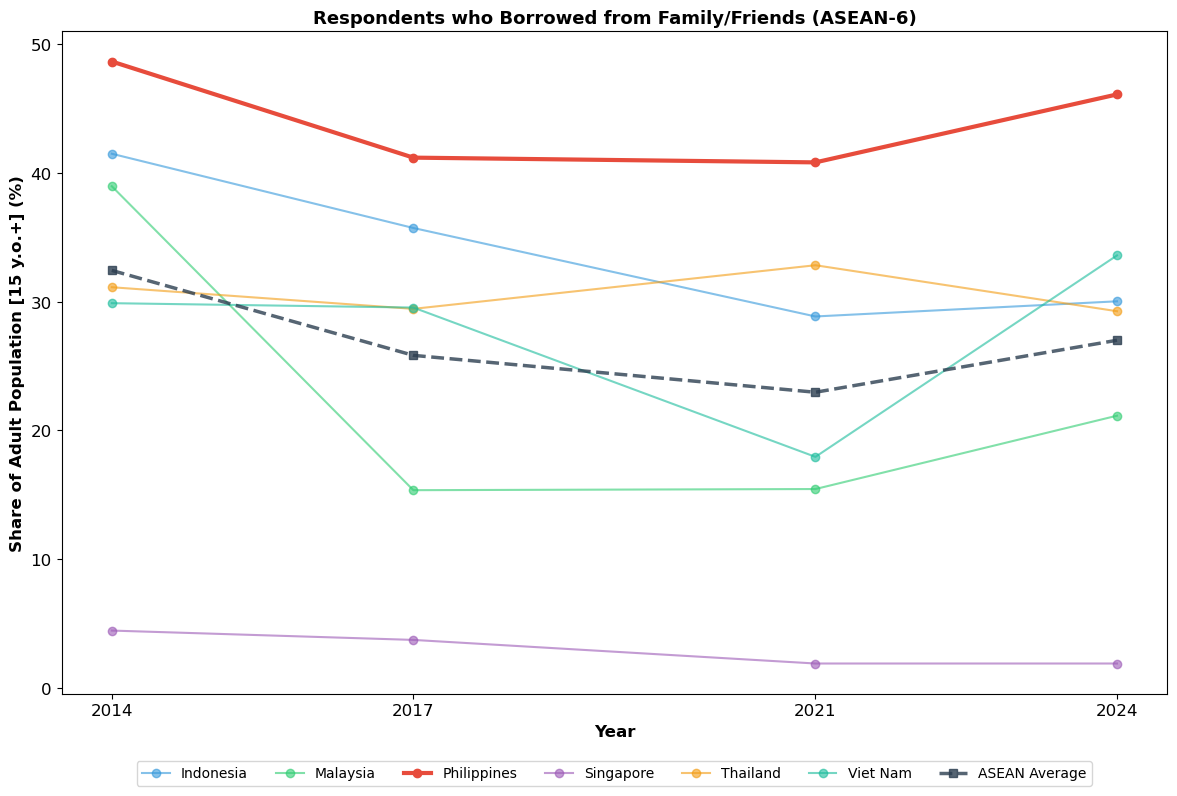

Respondents who Borrowed from Family/Friends


year,countrynewwb,2014,2017,2021,2024,average,17vs14 % Change,21vs17 % Change,24vs21 % Change
0,Indonesia,41.49,35.72,28.85,30.02,34.02,-13.90,-19.24,4.08
1,Malaysia,38.96,15.35,15.44,21.14,22.72,-60.60,0.57,36.90
2,Philippines,48.65,41.18,40.82,46.09,44.19,-15.35,-0.89,12.93
3,Singapore,4.45,3.72,1.89,1.89,2.98,-16.32,-49.30,0.00
4,Thailand,31.12,29.44,32.83,29.25,30.66,-5.40,11.52,-10.88
5,Viet Nam,29.88,29.54,17.94,33.59,27.74,-1.13,-39.27,87.23


Average across Years (%)


year,index,2014,2017,2021,2024,average,17vs14 % Change,21vs17 % Change,24vs21 % Change
0,fin22b,32.42,25.82,22.96,27.00,27.05,-20.35,-11.10,17.59


In [68]:
compare_over_time(df_filtered, "fin22b",'Respondents who Borrowed from Family/Friends', 4, 50)

**Observations**

*   **Informal borrowing (Family/Friends) remains the most common borrowing source across ASEAN-6**, averaging 30–37% of adults over the past decade. Although it declined from around 37% in 2014 to 27% in 2021, it rebounded slightly to about 32% by 2024, showing that community and trust-based lending remain deeply rooted in financial behavior.

*   **Formal borrowing (Banks/Financial Institutions) shows modest participation**, ranging between 14% and 22%. It peaked slightly around 2017 (about 21%), but then gradually declined to around 15% in 2024, suggesting slow progress in expanding formal credit access or a preference for informal borrowing channels.

*   Borrowing from **Mobile Money Providers is still minimal**, with only 2–3% of adults using this channel since its introduction in 2021. While small, it represents the emerging role of digital finance in expanding credit opportunities—especially in countries with growing fintech adoption.

**Observations**

*   Over the past decade, borrowing from family or friends remained the most common form of borrowing in the region, with around 25% to 35% of adults relying on informal personal networks for loans.

*   The regional average slightly dipped around 2021 (about 27%) before recovering to roughly 31% by 2024, showing continued reliance on social lending.

*   Informal borrowing remains more prevalent than formal or digital channels, highlighting its importance in providing quick and flexible access to funds.
*   Overall, informal borrowing continues to play a crucial role in financial resilience across ASEAN-6, particularly during periods of economic uncertainty.

#### Summary

**Borrowing in ASEAN Remains Mostly Informal**

* Family and Friends Remain the Main Borrowing Source. Around 25%–35% of adults in ASEAN-6 still rely on family or friends for loans. This steady pattern over the decade shows how trust-based lending remains deeply rooted in communities, especially where access to formal credit is limited.
* Formal Borrowing Holds Steady but Modest. Borrowing from banks and financial institutions stays moderate at roughly 20% across the region. While this suggests progress in financial inclusion, it also indicates that many adults still prefer informal or familiar lending options over formal credit systems.
* Digital Borrowing Emerges as a New Frontier. Although small at just 2%–5% of adults, borrowing from mobile money providers is steadily increasing, showing early signs of digital transformation in financial behavior—especially among the underserved and unbanked.
* A Balancing Act Between Tradition and Technology. ASEAN-6’s borrowing landscape reflects a blend of community reliance and digital innovation, where traditional borrowing remains dominant, but mobile and fintech-based credit is starting to reshape how people access funds.

## Philippines Deep Dive

This deep-dive analysis draws on the **World Bank Global Findex Microdata** collected in 2024 to examine the financial inclusion landscape in the **Philippine economy**, with a focus on three interrelated dimensions.

### Helper Functions

In [69]:
def compute_weighted_proportion(df, col1, col2):
    """
    Calculate weighted proportion on multiple levels of groupings.

    Parameters:
        col1 (object): first indicator grouping
        col2 (int): second indicator grouping

    Returns:
        grouped_pivot (dataframe): Data ready for plot.
    """
    grouped = (df.groupby([col1, col2], as_index=False)['wgt']
                    .sum()
                    .assign(weighted_proportion=lambda x: x['wgt'] / x.groupby(col1)['wgt'].transform('sum'))
                    .drop(columns='wgt'))

    grouped_pivot = grouped.pivot(index=col1,
                              columns=col2,
                              values='weighted_proportion')

    return grouped_pivot

In [70]:
def plot_stacked_barh(data, responses, palette, plot_title):
    """
    Plot a stacked horizontal barplot of the data.
    """
    ax = data[responses].plot(kind='barh',
                                 stacked=True,
                                 width=0.75,
                                 figsize=(6.5,4),
                                 color=palette
                                )

    ax.set_ylabel('')
    ax.tick_params(axis='y', labelsize=8)
    ax.set_xlabel('Weighted Proportion', fontsize=8)
    ax.tick_params(axis='x', labelsize=8)
    plt.xlim(0,1)
    ax.set_title(plot_title, fontsize=10, fontweight='bold')
    plt.legend(title='Response', bbox_to_anchor=(1.005, 1), loc='upper left', fontsize=8);

### How Filipinos Save for Old Age

First, we explore **how Filipinos save for old age** across different income quintiles, a window into the country’s preparedness for long-term financial security.

In [71]:
findex_map[findex_map['question'].str.contains("old age")]

,indicator_name,filter,question,key
26,fin17f,"Fin17A or Fin17B = ""yes""","In the past 12 months, have you saved or set aside any money for your old age?",2
87,fin45,NaN,"Which of the following financial issues are you MOST worried about? Please choose only one option. Are you most worried about not having enough money…?\n1. For your old age\n2. For your business\n3. For medical costs in case of a serious illness or accident\n4.For monthly expenses, such as food, housing, or bills\n5. For school or education fees\n6. Some other reason",2


We'll look at how respondents answered the question, "In the past 12 months, have you saved or set aside any money for your old age?" or Findex indicator `fin17f`.

In [72]:
# Recode the response to Indicator Fin17F
fin17f_map = {
    1: 'Yes',
    2: 'No',
    3: 'Don’t know',
    4: 'Refused'
}

ph['saved_for_old_age'] = ph['fin17f'].map(fin17f_map)

In [73]:
saving_old_age = compute_weighted_proportion(ph, col1='income_quintile', col2='saved_for_old_age')

inc_q_order = [
    'Poorest 20%',
    'Second 20%',
    'Middle 20%',
    'Fourth 20%',
    'Richest 20%'
]

saving_old_age = saving_old_age.reindex(inc_q_order)
saving_old_age.sort_values(by="Yes", ascending=False)

saved_for_old_age,No,Yes
income_quintile,,
Middle 20%,0.60,0.40
Poorest 20%,0.62,0.38
Second 20%,0.68,0.32
Richest 20%,0.69,0.31
Fourth 20%,0.74,0.26


At first glance, the data seem to defy the usual assumption that higher income always leads to more saving for the future. Here, **saving for old age is not monotonically increasing with income**; instead, it peaks in the middle-income quintile, where about 40% of adults report saving for old age, with the poorest not far behind at around 38%.

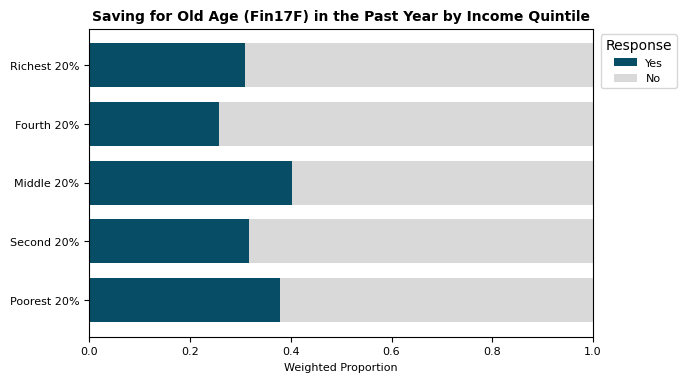

In [74]:
plot_stacked_barh(saving_old_age,
                  responses=['Yes', 'No'],
                  palette=['#074D66','#D9D9D9'],
                  plot_title="Saving for Old Age (Fin17F) in the Past Year by Income Quintile")

The bottom 40% lower-income households face strong income constraints, yet <b>nearly 38% of the poorest still report saving for old age</b> in the past 12 months. Their motivation may stem for insecurity about future income and limited safety nets.

Middle-income households show the <b>highest engagement in saving for old age</b> in the past 12 months at 40%. This segment often experiences both rising income and growing awareness of future risks but without yet the wealth that higher-income earners may enjoy.

Upper 40% higher-income households display <b>lower rates of self-reported savings for old age</b> at 25% to 31%. This could be because saving is embedded in asset accumulation rather than direct saving behavior.

This pattern suggests that <b>intentional saving for old age in the Philippines is driven more by perceived vulnerability and awareness than by sheer income level</b>. The middle class, in particular, emerges as the most active in preparing financially for later life, perhaps because they balance enough disposable income to save with still-limited access to comprehensive retirement schemes.

### Education and Access: How Learning Opens Doors to Formal Credit

 Second, we'll investigates patterns of **borrowing, whether through formal institutions or informal sources**, to reveal how credit access and trust in financial systems relate to educational attainment.

In [75]:
findex_map[findex_map['question'].str.contains("borrow")]

,indicator_name,filter,question,key
10,fin10,"Fin1 or Fin2 = ""yes""","A credit card is a card that allows you to borrow money in order to make payments or buy things, and you can pay the balance off later. Do you, personally, have a credit card?",2
31,fin22a,NaN,"In the past 12 months, have you borrowed any money from a bank or a similar financial institution?",2
32,fin22a_1,"Fin12_13 = ""yes""","In the past 12 months, have you borrowed any money from your mobile money provider?",4
33,fin22b,NaN,"In the past 12 months, have you borrowed any money from family, relatives, or friends?",2
34,fin22c,"Fin17C = ""yes""","In the past 12 months, have you borrowed any money from informal savings group/club such as [insert local terminology for savings group/club]?",2
35,fin22d,NaN,"In the past 12 months, have you borrowed money for health or medical purposes?",2
36,fin22e,NaN,"In the past 12 months, have you borrowed money to start or operate a business?",2
40,fin23,"Fin22A, Fin22A_1, Fin22B, Fin22C, and Fin22G = ""no/dk/r""","In the past 12 months, have you borrowed money from any source for any reason?",2
43,fin24b,NaN,"Suppose your household lost its main source of income. About how long could you cover expenses by using savings, borrowing, selling something you own, seeking help from family and friends, or through some other way? Less than two weeks, about one month, about two months, or more than two months?",2


We'll look at how respondents answer the indicators `fin22a`, `fin22a_1`, `fin22b`, and `fin22c`.

In [76]:
# Classify type of borrowing, whether formal or informal
def classify_borrowing(row):
    """
    Classify an individual's borrowing type based on financial survey responses.

    Parameters
    row : pandas.Series
        A row of data containing the following columns:
        - 'fin22a' : int or float
            Indicator for formal borrowing or borrowing status.
        - 'fin22a_1' : int or float
            Secondary indicator for formal borrowing.
        - 'fin22b' : int or float
            Indicator for informal borrowing type 1.
        - 'fin22c' : int or float
            Indicator for informal borrowing type 2.

    Returns
    str: A classification label based on the respondent's borrowing behavior
    """

    if (row['fin22a'] == 1) or (row['fin22a_1'] == 1):
        return 'Formal'
    elif (row['fin22b'] == 1) or (row['fin22c'] == 1):
        return 'Informal'
    elif (row['fin22a'] == 2) or (row['fin22a'] == 3):
        return 'No Borrowing'

ph['borrow_type'] = ph.apply(classify_borrowing, axis=1)

In [77]:
# Formality of borrowing by education
borrow_by_educ = compute_weighted_proportion(ph, col1='education', col2='borrow_type')
borrow_by_educ.sort_values(by=['Formal'], ascending=False)

borrow_type,Formal,Informal,No Borrowing
education,,,
Tertiary,0.28,0.31,0.41
Secondary,0.09,0.38,0.52
Primary or less,0.08,0.44,0.48


Education clearly divides the borrowing landscape in the Philippines. Adults with **tertiary education** are **three times more likely to borrow formally** than those with only primary education (28.1% vs. 8.1%). Conversely, those with lower education rely far more heavily on informal borrowing from friends, family, or moneylenders. More respondents across all education levels borrow from family, friends, or informal savings groups, compared to those who borrow from financial institutions.

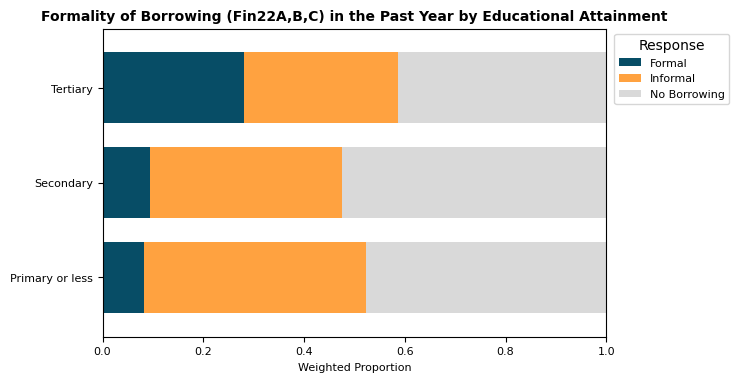

In [78]:
plot_stacked_barh(borrow_by_educ,
                  responses=['Formal', 'Informal', 'No Borrowing'],
                  palette=['#074D66','#FFA240','#D9D9D9'],
                  plot_title="Formality of Borrowing (Fin22A,B,C) in the Past Year by Educational Attainment")

This pattern reflects <b>how education functions as a gateway to financial access</b>. Higher educational attainment often comes with better financial literacy, formal employment, and the documentation required for formal credit (such as payslips, IDs, and stable income). Lower educational attainment, by contrast, tends to correlate with informal labor, irregular income, and weaker links to banks or regulated lenders.

A striking point is that informal borrowing dominates among those with primary or less education at 44%, compared with just 31% among tertiary graduates. This suggests that as <b>education rises, people move toward safer, more formalized credit channels</b>.

In summary, expanding credit access for the less educated means rethinking how institutions engage, communicate, and design financial products that meet people where they are.

### A Digital Generation Gap: How Age Shapes Financial Connectivity

Finally, we'll assesses the use of **digital financial channels** across different age groups, highlighting the promise and limits of digitalization in closing inclusion gaps.

In [79]:
ph['anydigpayment'].describe()

count   1000.00
mean       0.38
std        0.49
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        1.00
Name: anydigpayment, dtype: float64

In the Microdata Codebook, <b>anydigpayment</b> is the variable name for <i>Made or received a digital payment</i> defined as <u>1</u> if respondent used mobile money, a card, or a mobile phone to make a payment from an account, or used the internet to pay bills or to buy something online or in a store, or paid bills or sent or received remittances directly from or into a financial institution account or through a mobile money account in the past year. It also includes respondents who received payments for agricultural products, government transfers, wages, or a public sector pension into a financial institution account or through a mobile money account in the past year. The variable value is <u>0</u> if the respondent did not make or receive a digital payment.

In [80]:
# Recode the response
ph['use_of_digital'] = ph['anydigpayment'].map({1:'Used', 0:'Did Not Use'})

In [81]:
# Use of digital channel by generation
use_of_digital = compute_weighted_proportion(ph, col1='generation', col2='use_of_digital')

gen_order = [
    'Generation Z (1997 to 2012)',
    'Millennials (1981 to 1996)',
    'Generation X (1965 to 1980)',
    'Baby Boomers (1946 to 1964)',
    'Silent Generation (1928 to 1945)'
]

use_of_digital = use_of_digital.reindex(gen_order)
use_of_digital

use_of_digital,Did Not Use,Used
generation,,
Generation Z (1997 to 2012),0.49,0.51
Millennials (1981 to 1996),0.55,0.45
Generation X (1965 to 1980),0.72,0.28
Baby Boomers (1946 to 1964),0.77,0.23
Silent Generation (1928 to 1945),0.80,0.20


The data reveal a clear generational gradient in digital financial use:
- A slim majority of Generation Z or 50.6% of respondents born from 1997 to 2012 now use digital channels, marking them as the first Filipino generation for whom digital finance is mainstream.
- Among Millennials, usage dips slightly to 45.1%, reflecting both higher economic participation and perhaps greater caution toward digital transactions compared to Gen Z.
- For Generation X, usage drops sharply to 28.1%, and among Baby Boomers and the Silent Generation, fewer than one in four adults use digital finance at all.

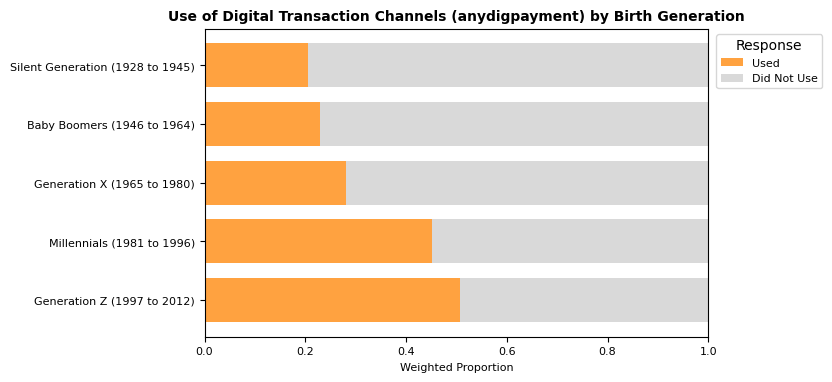

In [82]:
plot_stacked_barh(use_of_digital,
                  responses=['Used', 'Did Not Use'],
                  palette=['#FFA240','#D9D9D9'],
                  plot_title="Use of Digital Transaction Channels (anydigpayment) by Birth Generation")

The Philippine financial landscape is rapidly digitalizing; however, not all generations are keeping pace.

Younger generations are roughly twice as likely to engage in digital transactions as those from Generation X or older. Among adults born before 1980, fewer than one in three use digital financial channels, suggesting lower integration of digital methods within older cohorts. The gap between Generation Z (50.6%) and the Silent Generation (20.5%) represents a 30-percentage-point difference, illustrating a <b>substantial generational divide in access or preference for digital finance</b>.

This variation matters for how financial services reach different age groups. While digital channels are becoming a standard mode of access, a significant share of older Filipinos remain outside that ecosystem.

### Summary

The 2024 Global Findex data highlight clear differences in financial behavior across income, education, and generation in the Philippines. **Saving for old age is highest among the middle-income quintile**, with 40% reporting that they save, while the richest groups show lower rates.

Borrowing patterns differ by educational attainment. **Adults with tertiary education are more likely to borrow from formal institutions**, with 28% reporting formal borrowing, compared with 8% to 9% among those with primary or secondary schooling as informal borrowing is more common among those with lower education.

**Just over half of Generation Z adults report using digital finance**, followed by 45% of Millennials. Among Generation X, only 28% use digital channels, and usage drops to around 23% for Baby Boomers and 21% for the Silent Generation.

Together, these findings highlight that financial inclusion in the Philippines is advancing, but unevenly. Progress depends not only on expanding access, but also on tailoring financial products and education to the realities of different income groups, educational backgrounds, and generations.

## Insights and Recommendations

### Key Insights

1. Spending: **Filipinos prefer online payments over traditional banking**, marking a decisive shift toward digital-first transactions. This rapid digital payment adoption signals vast untapped potential in the fintech sector, particularly in adjacent services like digital lending and wealth management.
2. Saving: From 2021 to 2024, mobile wallet savings surged 147% while bank savings collapsed 46%, with digital adoption (+12pts) exceeding bank decline (-9pts). This suggests **digital platforms are not only displacing traditional banks but also capturing previously unbanked savers**, potentially from informal savings networks.
3. Borrowing: Despite digital adoption in spending and saving, **Filipinos remain heavily reliant on informal borrowing from family and friends.** This shows that Filipinos embrace digital platforms for transactions and savings, yet avoid digital lending. Barriers likely include fear of debt traps, lack of credit history recognition, or unfamiliarity with digital loan terms.

Three critical gaps emerge in Filipino financial behavior:

1. **Income paradox:** Middle-income earners (40%) save for old age at higher rates than the wealthy, suggesting the rich rely on other wealth-building strategies or feel less urgency
2. **Education blind spot:** Across ALL education levels, Filipinos prefer informal borrowing over formal institutions. Education alone won't solve the trust gap
3. **Generational divide:** A stark 30-percentage-point gap between Gen Z (50.6%) and Silent Generation (20.5%) in digital finance adoption reveals technology is generational, not universal"

### Bridging Critical Gaps in Financial Inclusion
Filipinos eagerly adopt digital solutions for spending and saving (leapfrogging traditional banks), yet cling to informal networks for borrowing. This reveals that financial inclusion through digital means is viable, but only when platforms replicate the trust, accessibility, and cultural familiarity of informal systems. The path forward requires **bridging three critical gaps:**

1. **For the income Paradox**:

Recognize that digital financial services currently serve middle-income earners best. Tailor products accordingly rather than pursuing the wealthy (who have alternatives) or the poorest (who need different interventions like financial literacy and livelihood support).

2. **For the education blindspot**:

Transparently address why Filipinos trust digital payments but fear digital credit through community testimonials, visible regulatory protections, and culturally-adapted loan structures (e.g., family co-borrowing features, flexible repayment matching informal norms).

1. **For the generational divide**:

Design hybrid models (digital + human support) to ease older demographics into digital finance, rather than expecting full migration. Partner with trusted community leaders and institutions.



